In [1]:
import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt, cos, pi, sin


In [54]:
data = pd.read_csv('raw_data.csv')

In [55]:
_1st_line = data.loc[0,:]

In [56]:
cols = []
for a,b in zip(_1st_line,data.columns):
    
    if str(a)=='nan':
        a = ''
    
    val = str(a)+' '+str(b)
    val = val.replace(' ','_')
    val = val.split('.')[0]
    
    cols.append(val)

In [57]:
data.columns = cols

In [58]:
data = data.loc[1:,:]

In [59]:
for col in cols[1:]:
    
    data[col] = data[col].apply(lambda x: str(x).replace('$',''))
    data[col] = data[col].astype(float)
    

In [60]:
#Price
data.rename(columns={'Premium_Brand_Avg_Unit_Price':'Price_Premium_Brand', 'Competitor_A_Avg_Unit_Price':'Price_Competitor_A', 'Competitor_B_Avg_Unit_Price':'Price_Competitor_B', 'Competitor_C_Avg_Unit_Price':'Price_Competitor_C', 'PRIVATE_LABEL_Avg_Unit_Price':'Price_Private_Label'},inplace=True)
# Distribution
data.rename(columns={'Premium_Brand_Avg':'Distribution_Premium_Brand', 'Competitor_A_Avg':'Distribution_Competitor_A', 'Competitor_B_Avg':'Distribution_Competitor_B', 'Competitor_C_Avg':'Distribution_Competitor_C', 'PRIVATE_LABEL_Avg':'Distribution_Private_Label'},inplace=True)
# Items
data.rename(columns={'Premium_Brand_Distinct_count_of_Units':'Items_Premium_Brand', 'Competitor_A_Distinct_count_of_Units':'Items_Competitor_A','Competitor_B_Distinct_count_of_Units':'Items_Competitor_B', 'Competitor_C_Distinct_count_of_Units':'Items_Competitor_C', 'PRIVATE_LABEL_Distinct_count_of_Units':'Items_Private_Label'},inplace=True)
# Features
data.rename(columns={'Premium_Brand_Feat_Wo_Disp_Units':'Feature_Premium_Brand', 'Competitor_A_Feat_Wo_Disp_Units':'Feature_Competitor_A', 'Competitor_B_Feat_Wo_Disp_Units':'Feature_Competitor_B', 'Competitor_C_Feat_Wo_Disp_Units':'Feature_Competitor_C', 'PRIVATE_LABEL_Feat_Wo_Disp_Units':'Feature_Private_Label'},inplace=True)
# Display
data.rename(columns={'Premium_Brand_Disp_Wo_Feat_Units':'Display_Premium_Brand', 'Competitor_A_Disp_Wo_Feat_Units':'Display_Competitor_A', 'Competitor_B_Disp_Wo_Feat_Units':'Display_Competitor_B', 'Competitor_C_Disp_Wo_Feat_Units':'Display_Competitor_C', 'PRIVATE_LABEL_Disp_Wo_Feat_Units':'Display_Private_Label'},inplace=True)
# Feature & Display
data.rename(columns={'Premium_Brand_Feat_Disp_Units':'Feature_and_Display_Premium_Brand', 'Competitor_A_Feat_Disp_Units':'Feature_and_Display_Competitor_A', 'Competitor_B_Feat_Disp_Units':'Feature_and_Display_Competitor_B', 'Competitor_C_Feat_Disp_Units':'Feature_and_Display_Competitor_C', 'PRIVATE_LABEL_Feat_Disp_Units':'Feature_and_Display_Private_Label'},inplace=True)
# Volume
data.rename(columns={'Premium_Brand_Units':'Volume_Premium_Brand', 'Competitor_A_Units':'Volume_Competitor_A', 'Competitor_B_Units':'Volume_Competitor_B', 'Competitor_C_Units':'Volume_Competitor_C', 'PRIVATE_LABEL_Units':'Volume_Private_Label'},inplace=True)

In [61]:
data['Feature_Premium_Brand'] = np.where(data['Volume_Premium_Brand']!=0,data['Feature_Premium_Brand']/data['Volume_Premium_Brand'],0)
data['Feature_Competitor_A'] = np.where(data['Volume_Competitor_A']!=0,data['Feature_Competitor_A']/data['Volume_Competitor_A'],0)
data['Feature_Competitor_B'] = np.where(data['Volume_Competitor_B']!=0,data['Feature_Competitor_B']/data['Volume_Competitor_B'],0)
data['Feature_Competitor_C'] = np.where(data['Volume_Competitor_C']!=0,data['Feature_Competitor_C']/data['Volume_Competitor_C'],0)
data['Feature_Private_Label'] = np.where(data['Volume_Private_Label']!=0,data['Feature_Private_Label']/data['Volume_Private_Label'],0)

In [62]:
data['Display_Premium_Brand'] = np.where(data['Volume_Premium_Brand']!=0,data['Display_Premium_Brand']/data['Volume_Premium_Brand'],0)
data['Display_Competitor_A'] = np.where(data['Volume_Competitor_A']!=0,data['Display_Competitor_A']/data['Volume_Competitor_A'],0)
data['Display_Competitor_B'] = np.where(data['Volume_Competitor_B']!=0,data['Display_Competitor_B']/data['Volume_Competitor_B'],0)
data['Display_Competitor_C'] = np.where(data['Volume_Competitor_C']!=0,data['Display_Competitor_C']/data['Volume_Competitor_C'],0)
data['Display_Private_Label'] = np.where(data['Volume_Private_Label']!=0,data['Display_Private_Label']/data['Volume_Private_Label'],0)

In [63]:
data['Feature_and_Display_Premium_Brand'] = np.where(data['Volume_Premium_Brand']!=0,data['Feature_and_Display_Premium_Brand']/data['Volume_Premium_Brand'],0)
data['Feature_and_Display_Competitor_A'] = np.where(data['Volume_Competitor_A']!=0,data['Feature_and_Display_Competitor_A']/data['Volume_Competitor_A'],0)
data['Feature_and_Display_Competitor_B'] = np.where(data['Volume_Competitor_B']!=0,data['Feature_and_Display_Competitor_B']/data['Volume_Competitor_B'],0)
data['Feature_and_Display_Competitor_B'] = np.where(data['Volume_Competitor_C']!=0,data['Feature_and_Display_Competitor_B']/data['Volume_Competitor_C'],0)
data['Feature_and_Display_Private_Label'] = np.where(data['Volume_Private_Label']!=0,data['Feature_and_Display_Private_Label']/data['Volume_Private_Label'],0)

In [64]:
data[data['_Date']=='30 April, 2016'].T

,18
_Date,"30 April, 2016"
Price_Premium_Brand,4.99
Price_Competitor_A,5.99
Price_Competitor_B,2.99
Price_Competitor_C,5.56
Price_Private_Label,2.99
Distribution_Premium_Brand,774
Distribution_Competitor_A,758
Distribution_Competitor_B,800
Distribution_Competitor_C,987


In [65]:
data.to_csv('clean_raw_data.csv',index=False)

In [66]:
sub = data[data.index>=data[data['_Date']=='12 March, 2016'].index[0]] 

In [67]:
result = []
for item in range(sub.shape[0]):

    if len(result)==0:
        
        result.append(0)
    
    else:
        
        result.append(result[-1]+(7/365.25))        

In [68]:
sub.loc[:,'Time'] = result

/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [69]:
sub

,_Date,Price_Premium_Brand,Price_Competitor_A,Price_Competitor_B,Price_Competitor_C,Price_Private_Label,Distribution_Premium_Brand,Distribution_Competitor_A,Distribution_Competitor_B,Distribution_Competitor_C,Distribution_Private_Label,Volume_Premium_Brand,Volume_Competitor_A,Volume_Competitor_B,Volume_Competitor_C,Volume_Private_Label,Feature_and_Display_Premium_Brand,Feature_and_Display_Competitor_A,Feature_and_Display_Competitor_B,Feature_and_Display_Competitor_C,Feature_and_Display_Private_Label,Feature_Premium_Brand,Feature_Competitor_A,Feature_Competitor_B,Feature_Competitor_C,Feature_Private_Label,Display_Premium_Brand,Display_Competitor_A,Display_Competitor_B,Display_Competitor_C,Display_Private_Label,Items_Premium_Brand,Items_Competitor_A,Items_Competitor_B,Items_Competitor_C,Items_Private_Label,Time
11,"12 March, 2016",4.98,5.98,2.99,5.55,3.29,757.0,702.0,316.0,943.0,614.0,3879.0,13118.0,1247.0,4088.0,9692.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.052311,2.0,4.0,1.0,1.0,3.0,0.000000
12,"19 March, 2016",4.98,5.99,2.99,5.56,3.29,804.0,747.0,328.0,962.0,622.0,4254.0,15567.0,1419.0,4548.0,10707.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.030354,2.0,5.0,1.0,1.0,3.0,0.019165
13,"26 March, 2016",4.98,6.00,2.99,5.56,3.29,792.0,514.0,370.0,963.0,627.0,4108.0,15249.0,1528.0,4349.0,10722.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.030498,2.0,6.0,1.0,1.0,3.0,0.038330
14,"2 April, 2016",4.99,6.04,2.99,5.56,3.29,763.0,633.0,615.0,950.0,606.0,3667.0,14723.0,2186.0,3742.0,9027.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028634,0.032330,0.0,0.028594,0.045641,2.0,6.0,1.0,1.0,3.0,0.057495
15,"9 April, 2016",4.99,6.06,2.98,5.56,3.30,765.0,698.0,697.0,978.0,617.0,3931.0,16936.0,2738.0,4417.0,9799.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026965,0.024032,0.0,0.025130,0.089907,2.0,6.0,1.0,1.0,3.0,0.076660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,"15 December, 2018",4.65,6.99,2.99,5.45,3.52,597.0,702.0,897.0,921.0,932.0,5048.0,9287.0,4345.0,3555.0,8396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.007860,0.0,0.000000,0.010719,4.0,5.0,1.0,1.0,2.0,2.759754
156,"22 December, 2018",4.66,6.99,2.99,5.44,3.51,557.0,674.0,858.0,914.0,904.0,4426.0,8219.0,3696.0,2940.0,6946.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002677,0.0,0.000000,0.009934,4.0,5.0,1.0,1.0,2.0,2.778919
157,"29 December, 2018",4.66,6.99,2.99,5.45,3.53,516.0,624.0,855.0,860.0,871.0,3953.0,7073.0,3024.0,2451.0,5877.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.016335,4.0,5.0,1.0,1.0,2.0,2.798084
158,"5 January, 2019",4.66,6.99,2.99,5.45,3.51,591.0,661.0,886.0,902.0,910.0,4981.0,8383.0,3982.0,2893.0,7176.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.017977,4.0,5.0,1.0,1.0,2.0,2.817248


In [70]:
sub.columns

Index(['_Date', 'Price_Premium_Brand', 'Price_Competitor_A',
       'Price_Competitor_B', 'Price_Competitor_C', 'Price_Private_Label',
       'Distribution_Premium_Brand', 'Distribution_Competitor_A',
       'Distribution_Competitor_B', 'Distribution_Competitor_C',
       'Distribution_Private_Label', 'Volume_Premium_Brand',
       'Volume_Competitor_A', 'Volume_Competitor_B', 'Volume_Competitor_C',
       'Volume_Private_Label', 'Feature_and_Display_Premium_Brand',
       'Feature_and_Display_Competitor_A', 'Feature_and_Display_Competitor_B',
       'Feature_and_Display_Competitor_C', 'Feature_and_Display_Private_Label',
       'Feature_Premium_Brand', 'Feature_Competitor_A', 'Feature_Competitor_B',
       'Feature_Competitor_C', 'Feature_Private_Label',
       'Display_Premium_Brand', 'Display_Competitor_A', 'Display_Competitor_B',
       'Display_Competitor_C', 'Display_Private_Label', 'Items_Premium_Brand',
       'Items_Competitor_A', 'Items_Competitor_B', 'Items_Competitor_C',
  

# Premium Brand

In [71]:
sub.columns

Index(['_Date', 'Price_Premium_Brand', 'Price_Competitor_A',
       'Price_Competitor_B', 'Price_Competitor_C', 'Price_Private_Label',
       'Distribution_Premium_Brand', 'Distribution_Competitor_A',
       'Distribution_Competitor_B', 'Distribution_Competitor_C',
       'Distribution_Private_Label', 'Volume_Premium_Brand',
       'Volume_Competitor_A', 'Volume_Competitor_B', 'Volume_Competitor_C',
       'Volume_Private_Label', 'Feature_and_Display_Premium_Brand',
       'Feature_and_Display_Competitor_A', 'Feature_and_Display_Competitor_B',
       'Feature_and_Display_Competitor_C', 'Feature_and_Display_Private_Label',
       'Feature_Premium_Brand', 'Feature_Competitor_A', 'Feature_Competitor_B',
       'Feature_Competitor_C', 'Feature_Private_Label',
       'Display_Premium_Brand', 'Display_Competitor_A', 'Display_Competitor_B',
       'Display_Competitor_C', 'Display_Private_Label', 'Items_Premium_Brand',
       'Items_Competitor_A', 'Items_Competitor_B', 'Items_Competitor_C',
  

In [72]:
premium_brand_df = sub[['_Date'
                     , 'Price_Premium_Brand','Distribution_Premium_Brand'
                     , 'Volume_Premium_Brand', 'Feature_and_Display_Premium_Brand'
                     , 'Feature_Premium_Brand', 'Display_Premium_Brand', 'Items_Premium_Brand', 'Time']]

X_features = ['Price_Premium_Brand', 'Distribution_Premium_Brand', 'Feature_and_Display_Premium_Brand','Feature_Premium_Brand', 'Display_Premium_Brand', 'Items_Premium_Brand','Time']
y_feature = 'Volume_Premium_Brand' 

lr = LinearRegression()

lin_reg = LinearRegression()
lin_reg.fit(sub[X_features],np.log(sub[y_feature]))

premium_brand_lr = pd.DataFrame(
                {
                    'Feature':['Intercept']+ [item for item in X_features],
                    'premium_brand_Coef':[lin_reg.intercept_] + list(lin_reg.coef_)
                }
            )
premium_brand_lr

,Feature,premium_brand_Coef
0,Intercept,6.796772
1,Price_Premium_Brand,-0.237825
2,Distribution_Premium_Brand,0.002537
3,Feature_and_Display_Premium_Brand,1.351443
4,Feature_Premium_Brand,0.064700
5,Display_Premium_Brand,0.687065
6,Items_Premium_Brand,0.397280
7,Time,-0.078757


In [73]:
for item in premium_brand_lr.itertuples():
    
#     print(item[1],item[2])
    
    f = item[1]
    if '_Premium_Brand' not in f:
        f = f+ '_Premium_Brand'
    f = f+'_coef'
    
    premium_brand_df.loc[:,f] = item[2] 
    

/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [74]:
premium_brand_df.loc[:,'Utility_Premium_Brand'] = np.exp(premium_brand_df.loc[:,'Intercept_Premium_Brand_coef'] + (premium_brand_df.loc[:,'Price_Premium_Brand_coef']*premium_brand_df.loc[:,'Price_Premium_Brand']) + (premium_brand_df.loc[:,'Distribution_Premium_Brand_coef']*premium_brand_df.loc[:,'Distribution_Premium_Brand']) + (premium_brand_df.loc[:,'Feature_and_Display_Premium_Brand_coef']*premium_brand_df.loc[:,'Feature_and_Display_Premium_Brand']) + (premium_brand_df.loc[:,'Feature_Premium_Brand_coef']*premium_brand_df.loc[:,'Feature_Premium_Brand']) + (premium_brand_df.loc[:,'Display_Premium_Brand_coef']*premium_brand_df.loc[:,'Display_Premium_Brand']) + (premium_brand_df.loc[:,'Items_Premium_Brand_coef']*premium_brand_df.loc[:,'Items_Premium_Brand']) + (premium_brand_df.loc[:,'Time_Premium_Brand_coef']*premium_brand_df.loc[:,'Time']))

/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


# Competitor A

In [75]:
competitor_A_df = sub[['_Date'
                     , 'Price_Competitor_A','Distribution_Competitor_A'
                     , 'Volume_Competitor_A', 'Feature_and_Display_Competitor_A'
                     , 'Feature_Competitor_A', 'Display_Competitor_A', 'Items_Competitor_A', 'Time']]


X_features = ['Price_Competitor_A', 'Distribution_Competitor_A', 'Feature_and_Display_Competitor_A','Feature_Competitor_A', 'Display_Competitor_A', 'Items_Competitor_A','Time']
y_feature = 'Volume_Competitor_A' 

lr = LinearRegression()

lin_reg = LinearRegression()
lin_reg.fit(sub[X_features],np.log(sub[y_feature]))

competitor_A_lr = pd.DataFrame(
                {
                    'Feature':['Intercept']+ [item for item in X_features],
                    'competitor_A_Coef':[lin_reg.intercept_] + list(lin_reg.coef_)
                }
            )
competitor_A_lr

,Feature,competitor_A_Coef
0,Intercept,8.518881
1,Price_Competitor_A,-0.306580
2,Distribution_Competitor_A,0.002366
3,Feature_and_Display_Competitor_A,-0.232851
4,Feature_Competitor_A,0.161305
5,Display_Competitor_A,0.820050
6,Items_Competitor_A,0.210749
7,Time,0.026033


In [76]:
for item in competitor_A_lr.itertuples():
    
#     print(item[1],item[2])
    
    f = item[1]
    if '_Competitor_A' not in f:
        f = f+ '_Competitor_A'
    f = f+'_coef'
    
    competitor_A_df.loc[:,f] = item[2] 


/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [77]:
competitor_A_df.loc[:,'Utility_Competitor_A'] = np.exp(competitor_A_df.loc[:,'Intercept_Competitor_A_coef'] + (competitor_A_df.loc[:,'Price_Competitor_A_coef']*competitor_A_df.loc[:,'Price_Competitor_A']) + (competitor_A_df.loc[:,'Distribution_Competitor_A_coef']*competitor_A_df.loc[:,'Distribution_Competitor_A']) + (competitor_A_df.loc[:,'Feature_and_Display_Competitor_A_coef']*competitor_A_df.loc[:,'Feature_and_Display_Competitor_A']) + (competitor_A_df.loc[:,'Feature_Competitor_A_coef']*competitor_A_df.loc[:,'Feature_Competitor_A']) + (competitor_A_df.loc[:,'Display_Competitor_A_coef']*competitor_A_df.loc[:,'Display_Competitor_A']) + (competitor_A_df.loc[:,'Items_Competitor_A_coef']*competitor_A_df.loc[:,'Items_Competitor_A']) + (competitor_A_df.loc[:,'Time_Competitor_A_coef']*competitor_A_df.loc[:,'Time']))

/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


# Competitor B

In [78]:
competitor_B_df = sub[['_Date'
                     , 'Price_Competitor_B','Distribution_Competitor_B'
                     , 'Volume_Competitor_B', 'Feature_and_Display_Competitor_B'
                     , 'Feature_Competitor_B', 'Display_Competitor_B', 'Items_Competitor_B', 'Time']]


X_features = ['Price_Competitor_B', 'Distribution_Competitor_B', 'Feature_and_Display_Competitor_B','Feature_Competitor_B', 'Display_Competitor_B', 'Items_Competitor_B','Time']
y_feature = 'Volume_Competitor_B' 

lr = LinearRegression()

lin_reg = LinearRegression()
lin_reg.fit(sub[X_features],np.log(sub[y_feature]))

competitor_B_lr = pd.DataFrame(
                {
                    'Feature':['Intercept']+ [item for item in X_features],
                    'competitor_B_Coef':[lin_reg.intercept_] + list(lin_reg.coef_)
                }
            )
competitor_B_lr

,Feature,competitor_B_Coef
0,Intercept,4.730390e+00
1,Price_Competitor_B,4.377034e-01
2,Distribution_Competitor_B,2.762158e-03
3,Feature_and_Display_Competitor_B,-5.093148e-15
4,Feature_Competitor_B,1.863709e-01
5,Display_Competitor_B,1.068931e+01
6,Items_Competitor_B,0.000000e+00
7,Time,1.769861e-03


In [79]:
for item in competitor_B_lr.itertuples():
    
    f = item[1]
    if '_Competitor_B' not in f:
        f = f+ '_Competitor_B'
    f = f+'_coef'
    
    competitor_B_df.loc[:,f] = item[2] 


/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [80]:
competitor_B_df.loc[:,'Utility_Competitor_B'] = np.exp(competitor_B_df.loc[:,'Intercept_Competitor_B_coef'] + (competitor_B_df.loc[:,'Price_Competitor_B_coef']*competitor_B_df.loc[:,'Price_Competitor_B']) + (competitor_B_df.loc[:,'Distribution_Competitor_B_coef']*competitor_B_df.loc[:,'Distribution_Competitor_B']) + (competitor_B_df.loc[:,'Feature_and_Display_Competitor_B_coef']*competitor_B_df.loc[:,'Feature_and_Display_Competitor_B']) + (competitor_B_df.loc[:,'Feature_Competitor_B_coef']*competitor_B_df.loc[:,'Feature_Competitor_B']) + (competitor_B_df.loc[:,'Display_Competitor_B_coef']*competitor_B_df.loc[:,'Display_Competitor_B']) + (competitor_B_df.loc[:,'Items_Competitor_B_coef']*competitor_B_df.loc[:,'Items_Competitor_B']) + (competitor_B_df.loc[:,'Time_Competitor_B_coef']*competitor_B_df.loc[:,'Time']))

/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


# Competitor C

In [81]:
competitor_C_df = sub[['_Date'
                     , 'Price_Competitor_C','Distribution_Competitor_C'
                     , 'Volume_Competitor_C', 'Feature_and_Display_Competitor_C'
                     , 'Feature_Competitor_C', 'Display_Competitor_C', 'Items_Competitor_C', 'Time']]


X_features = ['Price_Competitor_C', 'Distribution_Competitor_C', 'Feature_and_Display_Competitor_C','Feature_Competitor_C', 'Display_Competitor_C', 'Items_Competitor_C','Time']
y_feature = 'Volume_Competitor_C' 

lr = LinearRegression()

lin_reg = LinearRegression()
lin_reg.fit(sub[X_features],np.log(sub[y_feature]))

competitor_C_lr = pd.DataFrame(
                {
                    'Feature':['Intercept']+ [item for item in X_features],
                    'competitor_C_Coef':[lin_reg.intercept_] + list(lin_reg.coef_)
                }
            )
competitor_C_lr

,Feature,competitor_C_Coef
0,Intercept,7.734358
1,Price_Competitor_C,-0.387436
2,Distribution_Competitor_C,0.002774
3,Feature_and_Display_Competitor_C,-0.000050
4,Feature_Competitor_C,0.205424
5,Display_Competitor_C,4.517414
6,Items_Competitor_C,0.000000
7,Time,-0.009862


In [82]:
for item in competitor_C_lr.itertuples():
    
    f = item[1]
    if '_Competitor_C' not in f:
        f = f+ '_Competitor_C'
    f = f+'_coef'
    
    competitor_C_df.loc[:,f] = item[2] 


/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [83]:
competitor_C_df.loc[:,'Utility_Competitor_C'] = np.exp(competitor_C_df.loc[:,'Intercept_Competitor_C_coef'] + (competitor_C_df.loc[:,'Price_Competitor_C_coef']*competitor_C_df.loc[:,'Price_Competitor_C']) + (competitor_C_df.loc[:,'Distribution_Competitor_C_coef']*competitor_C_df.loc[:,'Distribution_Competitor_C']) + (competitor_C_df.loc[:,'Feature_and_Display_Competitor_C_coef']*competitor_C_df.loc[:,'Feature_and_Display_Competitor_C']) + (competitor_C_df.loc[:,'Feature_Competitor_C_coef']*competitor_C_df.loc[:,'Feature_Competitor_C']) + (competitor_C_df.loc[:,'Display_Competitor_C_coef']*competitor_C_df.loc[:,'Display_Competitor_C']) + (competitor_C_df.loc[:,'Items_Competitor_C_coef']*competitor_C_df.loc[:,'Items_Competitor_C']) + (competitor_C_df.loc[:,'Time_Competitor_C_coef']*competitor_C_df.loc[:,'Time']))

/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


# Private Label

In [84]:
private_label_df = sub[['_Date',
                     'Price_Private_Label', 'Distribution_Private_Label', 'Feature_and_Display_Private_Label','Feature_Private_Label', 'Display_Private_Label', 'Items_Private_Label','Time']]


X_features = ['Price_Private_Label', 'Distribution_Private_Label', 'Feature_and_Display_Private_Label','Feature_Private_Label', 'Display_Private_Label', 'Items_Private_Label','Time']
y_feature = 'Volume_Private_Label' 

lr = LinearRegression()

lin_reg = LinearRegression()
lin_reg.fit(sub[X_features],np.log(sub[y_feature]))

private_label_lr = pd.DataFrame(
                {
                    'Feature':['Intercept']+ [item for item in X_features],
                    'private_label_Coef':[lin_reg.intercept_] + list(lin_reg.coef_)
                }
            )
private_label_lr

,Feature,private_label_Coef
0,Intercept,9.662318
1,Price_Private_Label,-0.928904
2,Distribution_Private_Label,0.001794
3,Feature_and_Display_Private_Label,-0.518402
4,Feature_Private_Label,0.624555
5,Display_Private_Label,2.726038
6,Items_Private_Label,0.387790
7,Time,0.061392


In [85]:
for item in private_label_lr.itertuples():
    
    
    f = item[1]
    if '_Private_Label' not in f:
        f = f+ '_Private_Label'
    f = f+'_coef'
    
    private_label_df.loc[:,f] = item[2] 


/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [86]:
private_label_df.loc[:,'Utility_Private_Label'] = np.exp(private_label_df.loc[:,'Intercept_Private_Label_coef'] + (private_label_df.loc[:,'Price_Private_Label_coef']*private_label_df.loc[:,'Price_Private_Label']) + (private_label_df.loc[:,'Distribution_Private_Label_coef']*private_label_df.loc[:,'Distribution_Private_Label']) + (private_label_df.loc[:,'Feature_and_Display_Private_Label_coef']*private_label_df.loc[:,'Feature_and_Display_Private_Label']) + (private_label_df.loc[:,'Feature_Private_Label_coef']*private_label_df.loc[:,'Feature_Private_Label']) + (private_label_df.loc[:,'Display_Private_Label_coef']*private_label_df.loc[:,'Display_Private_Label']) + (private_label_df.loc[:,'Items_Private_Label_coef']*private_label_df.loc[:,'Items_Private_Label']) + (private_label_df.loc[:,'Time_Private_Label_coef']*private_label_df.loc[:,'Time']))

/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


# Utility Compilation

In [87]:
utility = pd.concat([premium_brand_df[['Utility_Premium_Brand']],competitor_A_df[['Utility_Competitor_A']],competitor_B_df[['Utility_Competitor_B']],competitor_C_df[['Utility_Competitor_C']],private_label_df[['Utility_Private_Label']]], axis=1)
utility.loc[:,'total'] = utility.loc[:,'Utility_Premium_Brand']+utility.loc[:,'Utility_Competitor_A']+utility.loc[:,'Utility_Competitor_B']+utility.loc[:,'Utility_Competitor_C']+utility.loc[:,'Utility_Private_Label']
utility['share_Premium_Brand'] = utility.loc[:,'Utility_Premium_Brand']/utility.loc[:,'total']
utility['share_Competitor_A'] = utility.loc[:,'Utility_Competitor_A']/utility.loc[:,'total']
utility['share_Competitor_B'] = utility.loc[:,'Utility_Competitor_B']/utility.loc[:,'total']
utility['share_Competitor_C'] = utility.loc[:,'Utility_Competitor_C']/utility.loc[:,'total']
utility['share_Private_Label'] = utility.loc[:,'Utility_Private_Label']/utility.loc[:,'total']

In [88]:
utility

,Utility_Premium_Brand,Utility_Competitor_A,Utility_Competitor_B,Utility_Competitor_C,Utility_Private_Label,total,share_Premium_Brand,share_Competitor_A,share_Competitor_B,share_Competitor_C,share_Private_Label
11,4134.739101,9791.384943,1004.219277,3639.887390,8215.091994,26785.322705,0.154366,0.365550,0.037491,0.135891,0.306701
12,4651.248409,13411.899654,1038.098026,3821.297714,7858.891326,30781.435129,0.151106,0.435714,0.033725,0.124143,0.255313
13,4504.995684,9517.331599,1165.831746,3831.187431,7942.157692,26961.504152,0.167090,0.352997,0.043241,0.142098,0.294574
14,4252.090696,12799.193840,2293.771557,4204.266504,7980.227295,31529.549891,0.134860,0.405943,0.072750,0.133344,0.253103
15,4262.382171,14742.216920,2864.378163,4472.403713,9108.975988,35450.356954,0.120235,0.415855,0.080800,0.126160,0.256950
...,...,...,...,...,...,...,...,...,...,...,...
155,5308.227561,9591.698904,5022.403666,3464.112984,8423.979981,31810.423095,0.166871,0.301527,0.157885,0.108899,0.264818
156,4777.444861,8943.313646,4509.644792,3410.046415,8078.236919,29718.686632,0.160756,0.300932,0.151744,0.114744,0.271823
157,4299.055553,7932.153605,4472.581843,2923.792484,7614.230136,27241.813622,0.157811,0.291176,0.164181,0.107327,0.279505
158,5192.067316,8662.078962,4872.595031,3284.416004,8366.335535,30377.492848,0.170918,0.285148,0.160401,0.108120,0.275412


# SSE

In [89]:
sub.loc[:,'Total_Volume'] = sub.loc[:,'Volume_Premium_Brand']+sub.loc[:,'Volume_Competitor_A']+sub.loc[:,'Volume_Competitor_B']+sub.loc[:,'Volume_Competitor_C']+sub.loc[:,'Volume_Private_Label']

/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [90]:
sub.loc[:,'Premium_Brand_pctg_share'] = sub.loc[:,'Volume_Premium_Brand']/sub.loc[:,'Total_Volume']
sub.loc[:,'Competitor_A_pctg_share'] = sub.loc[:,'Volume_Competitor_A']/sub.loc[:,'Total_Volume']
sub.loc[:,'Competitor_B_pctg_share'] = sub.loc[:,'Volume_Competitor_B']/sub.loc[:,'Total_Volume']
sub.loc[:,'Competitor_C_pctg_share'] = sub.loc[:,'Volume_Competitor_C']/sub.loc[:,'Total_Volume']
sub.loc[:,'Private_Label_pctg_share'] = sub.loc[:,'Volume_Private_Label']/sub.loc[:,'Total_Volume']

In [91]:
# for item in premium_brand.itertuples():
    
#     feature = item[1]
#     if 'Premium_Brand' not in feature:
#         feature = feature+'_Premium_Brand'
    
#     coef = item[2]    
#     sub.loc[:,feature] = coef
    
# for item in competitor_A.itertuples():
    
#     feature = item[1]
#     if 'competitor_A' not in feature:
#         feature = feature+'_competitor_A'
    
#     coef = item[2]    
#     sub.loc[:,feature] = coef
    
# for item in competitor_B.itertuples():
    
#     feature = item[1]
#     if 'competitor_B' not in feature:
#         feature = feature+'_competitor_B'
    
#     coef = item[2]    
#     sub.loc[:,feature] = coef    
    
# for item in competitor_C.itertuples():
    
#     feature = item[1]
#     if 'competitor_C' not in feature:
#         feature = feature+'_competitor_C'
    
#     coef = item[2]    
#     sub.loc[:,feature] = coef    
    
# for item in private_label.itertuples():
    
#     feature = item[1]
#     if 'Private_Label' not in feature:
#         feature = feature+'_Private_Label'
    
#     coef = item[2]    
#     sub.loc[:,feature] = coef    
    


In [92]:
sub.columns

Index(['_Date', 'Price_Premium_Brand', 'Price_Competitor_A',
       'Price_Competitor_B', 'Price_Competitor_C', 'Price_Private_Label',
       'Distribution_Premium_Brand', 'Distribution_Competitor_A',
       'Distribution_Competitor_B', 'Distribution_Competitor_C',
       'Distribution_Private_Label', 'Volume_Premium_Brand',
       'Volume_Competitor_A', 'Volume_Competitor_B', 'Volume_Competitor_C',
       'Volume_Private_Label', 'Feature_and_Display_Premium_Brand',
       'Feature_and_Display_Competitor_A', 'Feature_and_Display_Competitor_B',
       'Feature_and_Display_Competitor_C', 'Feature_and_Display_Private_Label',
       'Feature_Premium_Brand', 'Feature_Competitor_A', 'Feature_Competitor_B',
       'Feature_Competitor_C', 'Feature_Private_Label',
       'Display_Premium_Brand', 'Display_Competitor_A', 'Display_Competitor_B',
       'Display_Competitor_C', 'Display_Private_Label', 'Items_Premium_Brand',
       'Items_Competitor_A', 'Items_Competitor_B', 'Items_Competitor_C',
  

In [93]:
shares = sub[['Volume_Premium_Brand','Volume_Competitor_A', 'Volume_Competitor_B', 'Volume_Competitor_C','Volume_Private_Label'
            ,'Premium_Brand_pctg_share', 'Competitor_A_pctg_share','Competitor_B_pctg_share', 'Competitor_C_pctg_share','Private_Label_pctg_share']]
shares

,Volume_Premium_Brand,Volume_Competitor_A,Volume_Competitor_B,Volume_Competitor_C,Volume_Private_Label,Premium_Brand_pctg_share,Competitor_A_pctg_share,Competitor_B_pctg_share,Competitor_C_pctg_share,Private_Label_pctg_share
11,3879.0,13118.0,1247.0,4088.0,9692.0,0.121128,0.409630,0.038940,0.127654,0.302648
12,4254.0,15567.0,1419.0,4548.0,10707.0,0.116564,0.426552,0.038882,0.124620,0.293383
13,4108.0,15249.0,1528.0,4349.0,10722.0,0.114251,0.424102,0.042496,0.120953,0.298198
14,3667.0,14723.0,2186.0,3742.0,9027.0,0.109972,0.441535,0.065557,0.112221,0.270715
15,3931.0,16936.0,2738.0,4417.0,9799.0,0.103937,0.447794,0.072394,0.116787,0.259089
...,...,...,...,...,...,...,...,...,...,...
155,5048.0,9287.0,4345.0,3555.0,8396.0,0.164800,0.303190,0.141850,0.116059,0.274101
156,4426.0,8219.0,3696.0,2940.0,6946.0,0.168757,0.313379,0.140923,0.112098,0.264842
157,3953.0,7073.0,3024.0,2451.0,5877.0,0.176647,0.316069,0.135133,0.109527,0.262624
158,4981.0,8383.0,3982.0,2893.0,7176.0,0.181689,0.305782,0.145249,0.105526,0.261755


In [94]:
z = pd.concat([utility,shares],axis=1)

In [95]:
z

,Utility_Premium_Brand,Utility_Competitor_A,Utility_Competitor_B,Utility_Competitor_C,Utility_Private_Label,total,share_Premium_Brand,share_Competitor_A,share_Competitor_B,share_Competitor_C,share_Private_Label,Volume_Premium_Brand,Volume_Competitor_A,Volume_Competitor_B,Volume_Competitor_C,Volume_Private_Label,Premium_Brand_pctg_share,Competitor_A_pctg_share,Competitor_B_pctg_share,Competitor_C_pctg_share,Private_Label_pctg_share
11,4134.739101,9791.384943,1004.219277,3639.887390,8215.091994,26785.322705,0.154366,0.365550,0.037491,0.135891,0.306701,3879.0,13118.0,1247.0,4088.0,9692.0,0.121128,0.409630,0.038940,0.127654,0.302648
12,4651.248409,13411.899654,1038.098026,3821.297714,7858.891326,30781.435129,0.151106,0.435714,0.033725,0.124143,0.255313,4254.0,15567.0,1419.0,4548.0,10707.0,0.116564,0.426552,0.038882,0.124620,0.293383
13,4504.995684,9517.331599,1165.831746,3831.187431,7942.157692,26961.504152,0.167090,0.352997,0.043241,0.142098,0.294574,4108.0,15249.0,1528.0,4349.0,10722.0,0.114251,0.424102,0.042496,0.120953,0.298198
14,4252.090696,12799.193840,2293.771557,4204.266504,7980.227295,31529.549891,0.134860,0.405943,0.072750,0.133344,0.253103,3667.0,14723.0,2186.0,3742.0,9027.0,0.109972,0.441535,0.065557,0.112221,0.270715
15,4262.382171,14742.216920,2864.378163,4472.403713,9108.975988,35450.356954,0.120235,0.415855,0.080800,0.126160,0.256950,3931.0,16936.0,2738.0,4417.0,9799.0,0.103937,0.447794,0.072394,0.116787,0.259089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,5308.227561,9591.698904,5022.403666,3464.112984,8423.979981,31810.423095,0.166871,0.301527,0.157885,0.108899,0.264818,5048.0,9287.0,4345.0,3555.0,8396.0,0.164800,0.303190,0.141850,0.116059,0.274101
156,4777.444861,8943.313646,4509.644792,3410.046415,8078.236919,29718.686632,0.160756,0.300932,0.151744,0.114744,0.271823,4426.0,8219.0,3696.0,2940.0,6946.0,0.168757,0.313379,0.140923,0.112098,0.264842
157,4299.055553,7932.153605,4472.581843,2923.792484,7614.230136,27241.813622,0.157811,0.291176,0.164181,0.107327,0.279505,3953.0,7073.0,3024.0,2451.0,5877.0,0.176647,0.316069,0.135133,0.109527,0.262624
158,5192.067316,8662.078962,4872.595031,3284.416004,8366.335535,30377.492848,0.170918,0.285148,0.160401,0.108120,0.275412,4981.0,8383.0,3982.0,2893.0,7176.0,0.181689,0.305782,0.145249,0.105526,0.261755


In [96]:
# sub.loc[:,'Premium_Brand_pctg_share'] = sub.loc[:,'Volume_Premium_Brand']/sub.loc[:,'Total_Volume']
# sub.loc[:,'Competitor_A_pctg_share'] = sub.loc[:,'Volume_Competitor_A']/sub.loc[:,'Total_Volume']
# sub.loc[:,'Competitor_B_pctg_share'] = sub.loc[:,'Volume_Competitor_B']/sub.loc[:,'Total_Volume']
# sub.loc[:,'Competitor_C_pctg_share'] = sub.loc[:,'Volume_Competitor_C']/sub.loc[:,'Total_Volume']
# sub.loc[:,'Private_Label_pctg_share'] = sub.loc[:,'Volume_Private_Label']/sub.loc[:,'Total_Volume']

z['Error_Premium_Brand'] = np.log(z['share_Premium_Brand'])*z['Volume_Premium_Brand']
z['Error_Customer_A'] = np.log(z['share_Competitor_A'])*z['Volume_Competitor_A']
z['Error_Customer_B'] = np.log(z['share_Competitor_B'])*z['Volume_Competitor_B']
z['Error_Customer_C'] = np.log(z['share_Competitor_C'])*z['Volume_Competitor_C']
z['Error_Private_Label'] = np.log(z['share_Private_Label'])*z['Volume_Private_Label']

In [97]:
z[['Error_Premium_Brand','Error_Customer_A','Error_Customer_B','Error_Customer_C','Error_Private_Label']].to_numpy().sum()

-8929204.510621969

In [98]:
z.head()

,Utility_Premium_Brand,Utility_Competitor_A,Utility_Competitor_B,Utility_Competitor_C,Utility_Private_Label,total,share_Premium_Brand,share_Competitor_A,share_Competitor_B,share_Competitor_C,share_Private_Label,Volume_Premium_Brand,Volume_Competitor_A,Volume_Competitor_B,Volume_Competitor_C,Volume_Private_Label,Premium_Brand_pctg_share,Competitor_A_pctg_share,Competitor_B_pctg_share,Competitor_C_pctg_share,Private_Label_pctg_share,Error_Premium_Brand,Error_Customer_A,Error_Customer_B,Error_Customer_C,Error_Private_Label
11,4134.739101,9791.384943,1004.219277,3639.887390,8215.091994,26785.322705,0.154366,0.365550,0.037491,0.135891,0.306701,3879.0,13118.0,1247.0,4088.0,9692.0,0.121128,0.409630,0.038940,0.127654,0.302648,-7247.639373,-13201.314591,-4094.703664,-8159.244649,-11454.791888
12,4651.248409,13411.899654,1038.098026,3821.297714,7858.891326,30781.435129,0.151106,0.435714,0.033725,0.124143,0.255313,4254.0,15567.0,1419.0,4548.0,10707.0,0.116564,0.426552,0.038882,0.124620,0.293383,-8039.107504,-12932.587342,-4809.731058,-9488.590965,-14617.905299
13,4504.995684,9517.331599,1165.831746,3831.187431,7942.157692,26961.504152,0.167090,0.352997,0.043241,0.142098,0.294574,4108.0,15249.0,1528.0,4349.0,10722.0,0.114251,0.424102,0.042496,0.120953,0.298198,-7350.128673,-15878.716012,-4799.410257,-8485.922264,-13104.697399
14,4252.090696,12799.193840,2293.771557,4204.266504,7980.227295,31529.549891,0.134860,0.405943,0.072750,0.133344,0.253103,3667.0,14723.0,2186.0,3742.0,9027.0,0.109972,0.441535,0.065557,0.112221,0.270715,-7346.887332,-13273.417739,-5728.910898,-7539.476474,-12402.721608
15,4262.382171,14742.216920,2864.378163,4472.403713,9108.975988,35450.356954,0.120235,0.415855,0.080800,0.126160,0.256950,3931.0,16936.0,2738.0,4417.0,9799.0,0.103937,0.447794,0.072394,0.116787,0.259089,-8327.057439,-14859.952012,-6888.211230,-9144.105709,-13315.596747


In [99]:
Premium_Label = pd.concat([sub[['_Date']],z[['Premium_Brand_pctg_share','share_Premium_Brand']]],axis=1)
Premium_Label['_Date'] = pd.to_datetime(Premium_Label['_Date'])
Premium_Label

,_Date,Premium_Brand_pctg_share,share_Premium_Brand
11,2016-03-12,0.121128,0.154366
12,2016-03-19,0.116564,0.151106
13,2016-03-26,0.114251,0.167090
14,2016-04-02,0.109972,0.134860
15,2016-04-09,0.103937,0.120235
...,...,...,...
155,2018-12-15,0.164800,0.166871
156,2018-12-22,0.168757,0.160756
157,2018-12-29,0.176647,0.157811
158,2019-01-05,0.181689,0.170918


In [100]:
y_actual = Premium_Label['Premium_Brand_pctg_share']
y_predicted = Premium_Label['share_Premium_Brand']
rmse = sqrt(mean_squared_error(y_actual, y_predicted))
print('rmse:',round(rmse,2))

mape = (y_actual-y_predicted).mean()
print('mape:',round(mape*100,2))


rmse: 0.02
mape: -0.11


In [101]:
Competitor_A = pd.concat([sub[['_Date']],z[['Competitor_A_pctg_share','share_Competitor_A']]],axis=1)
Competitor_A['_Date'] = pd.to_datetime(Competitor_A['_Date'])
Competitor_A

,_Date,Competitor_A_pctg_share,share_Competitor_A
11,2016-03-12,0.409630,0.365550
12,2016-03-19,0.426552,0.435714
13,2016-03-26,0.424102,0.352997
14,2016-04-02,0.441535,0.405943
15,2016-04-09,0.447794,0.415855
...,...,...,...
155,2018-12-15,0.303190,0.301527
156,2018-12-22,0.313379,0.300932
157,2018-12-29,0.316069,0.291176
158,2019-01-05,0.305782,0.285148


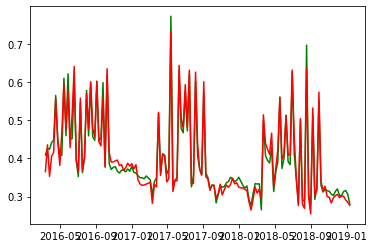

In [102]:
plt.plot(Competitor_A['_Date'],Competitor_A['Competitor_A_pctg_share'],c='g')
plt.plot(Competitor_A['_Date'],Competitor_A['share_Competitor_A'],c='r')

In [103]:
y_actual = Competitor_A['Competitor_A_pctg_share']
y_predicted = Competitor_A['share_Competitor_A']
rmse = sqrt(mean_squared_error(y_actual, y_predicted))
print('rmse:',round(rmse,2))

mape = (y_actual-y_predicted).mean()
print('mape:',round(mape*100,2))


rmse: 0.02
mape: 0.05


In [104]:
Competitor_B = pd.concat([sub[['_Date']],z[['Competitor_B_pctg_share','share_Competitor_B']]],axis=1)
Competitor_B['_Date'] = pd.to_datetime(Competitor_B['_Date'])
Competitor_B

,_Date,Competitor_B_pctg_share,share_Competitor_B
11,2016-03-12,0.038940,0.037491
12,2016-03-19,0.038882,0.033725
13,2016-03-26,0.042496,0.043241
14,2016-04-02,0.065557,0.072750
15,2016-04-09,0.072394,0.080800
...,...,...,...
155,2018-12-15,0.141850,0.157885
156,2018-12-22,0.140923,0.151744
157,2018-12-29,0.135133,0.164181
158,2019-01-05,0.145249,0.160401


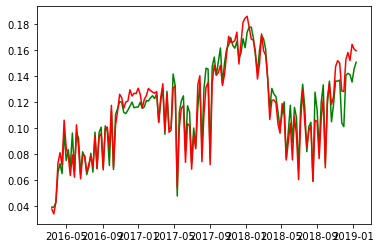

In [105]:
plt.plot(Competitor_B['_Date'],Competitor_B['Competitor_B_pctg_share'],c='g')
plt.plot(Competitor_B['_Date'],Competitor_B['share_Competitor_B'],c='r')

In [106]:
y_actual = Competitor_B['Competitor_B_pctg_share']
y_predicted = Competitor_B['share_Competitor_B']
rmse = sqrt(mean_squared_error(y_actual, y_predicted))
print('rmse:',round(rmse,2))

mape = (y_actual-y_predicted).mean()
print('mape:',round(mape*100,2))


rmse: 0.01
mape: 0.0


In [107]:
Competitor_C = pd.concat([sub[['_Date']],z[['Competitor_C_pctg_share','share_Competitor_C']]],axis=1)
Competitor_C['_Date'] = pd.to_datetime(Competitor_B['_Date'])
Competitor_C

,_Date,Competitor_C_pctg_share,share_Competitor_C
11,2016-03-12,0.127654,0.135891
12,2016-03-19,0.124620,0.124143
13,2016-03-26,0.120953,0.142098
14,2016-04-02,0.112221,0.133344
15,2016-04-09,0.116787,0.126160
...,...,...,...
155,2018-12-15,0.116059,0.108899
156,2018-12-22,0.112098,0.114744
157,2018-12-29,0.109527,0.107327
158,2019-01-05,0.105526,0.108120


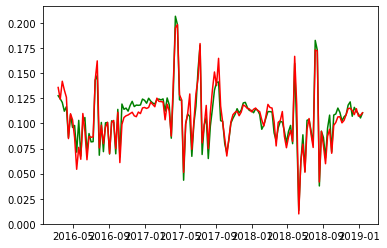

In [108]:
plt.plot(Competitor_C['_Date'],Competitor_C['Competitor_C_pctg_share'],c='g')
plt.plot(Competitor_C['_Date'],Competitor_C['share_Competitor_C'],c='r')

In [109]:
y_actual = Competitor_C['Competitor_C_pctg_share']
y_predicted = Competitor_C['share_Competitor_C']
rmse = sqrt(mean_squared_error(y_actual, y_predicted))
print('rmse:',round(rmse,2))

mape = (y_actual-y_predicted).mean()
print('mape:',round(mape*100,2))


rmse: 0.01
mape: 0.01


In [110]:
Private_Label = pd.concat([sub[['_Date']],z[['Private_Label_pctg_share','share_Private_Label']]],axis=1)
Private_Label['_Date'] = pd.to_datetime(Private_Label['_Date'])
Private_Label

,_Date,Private_Label_pctg_share,share_Private_Label
11,2016-03-12,0.302648,0.306701
12,2016-03-19,0.293383,0.255313
13,2016-03-26,0.298198,0.294574
14,2016-04-02,0.270715,0.253103
15,2016-04-09,0.259089,0.256950
...,...,...,...
155,2018-12-15,0.274101,0.264818
156,2018-12-22,0.264842,0.271823
157,2018-12-29,0.262624,0.279505
158,2019-01-05,0.261755,0.275412


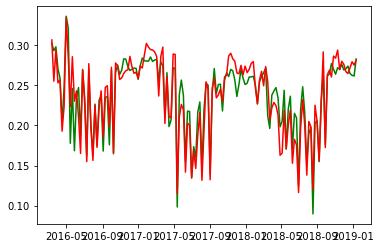

In [111]:
plt.plot(Private_Label['_Date'],Private_Label['Private_Label_pctg_share'],c='g')
plt.plot(Private_Label['_Date'],Private_Label['share_Private_Label'],c='r')

In [112]:
y_actual = Private_Label['Private_Label_pctg_share']
y_predicted = Private_Label['share_Private_Label']
rmse = sqrt(mean_squared_error(y_actual, y_predicted))
print('rmse:',round(rmse,2))

mape = (y_actual-y_predicted).mean()
print('mape:',round(mape*100,2))


rmse: 0.02
mape: 0.04


In [113]:
RML = pd.read_csv('RML.csv')

y_actual = RML['A']
y_predicted = RML['B']

rmse = sqrt(mean_squared_error(y_actual, y_predicted))
print('rmse:',rmse)

mape = (y_actual-y_predicted).mean()
print('mape:',mape*100)

rmse: 0.6606890850574831
mape: 5.234899328859051


# Choice Model

In [114]:
# a = np.array([-7.0581e-01, -7.0890e-02, -2.8171e-01,  1.2800e-03,  3.0786e-01,  1.1969e-01, 
#   2.7340e-01, -7.0581e-01,  5.5483e-01,  1.6880e-02, -3.8318e-01,  8.8000e-04,
#   1.1361e-01,  1.4200e-03,  9.4103e-01,  5.5483e-01, -2.7923e-01,  4.1850e-02,
#  -8.2399e-01,  2.4100e-03, -2.7923e-01,  9.6860e-02,  1.1140e-02, -2.7923e-01,
#  -4.4605e-01, -7.9600e-03, -3.9125e-01,  2.3100e-03, -4.4605e-01,  4.8830e-02,
#   5.2905e-01, -4.4605e-01,  8.7627e-01,  2.0120e-02, -8.2513e-01,  4.8000e-04,
#   8.9810e-02,  1.1391e-01, -2.8738e-01,  8.7627e-01])

# a = np.array([

#  1.27117458e+00,  9.10509525e-01, -3.20688817e-01,  9.51501359e-04,
#   2.96756080e-01,  9.19136289e-02,  5.71940634e-01,  1.23124026e+00,
#   3.33894804e+00,  1.01363665e+00, -3.97181360e-01,  9.35268866e-04,
#   1.20105780e-01,  9.29557726e-02,  8.17563993e-01,  4.04372176e-01,
#  -3.30912497e+00,  1.03936368e+00,  1.82794316e+00,  2.47865201e-03,
#  -3.30912497e+00,  8.02133634e-02,  6.03912204e-02, -2.79230000e-01,
#   2.33238914e-01,  9.89193023e-01, -3.81900505e-01,  2.69971226e-03,
#   2.33238914e-01, -3.90537900e-02, -5.55487113e-01,  5.26335589e-04,
#   3.30895733e+00,  1.02918900e+00, -7.34223411e-01,  6.41502261e-04,
#   1.52651605e-01,  4.85345169e-01,  5.75799702e-01, -1.22832836e+00
# ])

# np.reshape(a, (5, 8))

# np.random.random((5, 8))

x = np.empty(shape=(5,8))
x.fill(np.nan)
print(x[0,1])
print(type(x[0,1]))
print(np.isnan(x[0,1]))



nan
<class 'numpy.float64'>
True


In [115]:
def f(x):
    
    x  = np.reshape(x, (5, 8))

    # Premium Brand
    Price_Premium_Brand = list(sub['Price_Premium_Brand'])
    Distribution_Premium_Brand = list(sub['Distribution_Premium_Brand'])
    Feature_and_Display_Premium_Brand = list(sub['Feature_and_Display_Premium_Brand'])
    Feature_Premium_Brand = list(sub['Feature_Premium_Brand'])
    Display_Premium_Brand = list(sub['Display_Premium_Brand'])
    Items_Premium_Brand = list(sub['Items_Premium_Brand'])    
    Time = list(sub['Time'])
    Volume_Premium_Brand = list(sub['Volume_Premium_Brand'])
    
    # Competitor A
    Price_Competitor_A = list(sub['Price_Competitor_A'])
    Distribution_Competitor_A = list(sub['Distribution_Competitor_A'])
    Feature_and_Display_Competitor_A = list(sub['Feature_and_Display_Competitor_A'])
    Feature_Competitor_A = list(sub['Feature_Competitor_A'])
    Display_Competitor_A = list(sub['Display_Competitor_A'])
    Items_Competitor_A = list(sub['Items_Competitor_A'])
    Time = list(sub['Time'])
    Volume_Competitor_A = list(sub['Volume_Competitor_A'])
    
    # Competitor B
    Price_Competitor_B = list(sub['Price_Competitor_B'])
    Distribution_Competitor_B = list(sub['Distribution_Competitor_B'])
    Feature_and_Display_Competitor_B = list(sub['Feature_and_Display_Competitor_B'])
    Feature_Competitor_B = list(sub['Feature_Competitor_B'])
    Display_Competitor_B = list(sub['Display_Competitor_B'])
    Items_Competitor_B = list(sub['Items_Competitor_B'])
    Time = list(sub['Time'])
    Volume_Competitor_B = list(sub['Volume_Competitor_B'])
    
    # Competitor C
    Price_Competitor_C = list(sub['Price_Competitor_C'])
    Distribution_Competitor_C = list(sub['Distribution_Competitor_C'])
    Feature_and_Display_Competitor_C = list(sub['Feature_and_Display_Competitor_C'])
    Feature_Competitor_C = list(sub['Feature_Competitor_C'])
    Display_Competitor_C = list(sub['Display_Competitor_C'])
    Items_Competitor_C = list(sub['Items_Competitor_C'])
    Time = list(sub['Time'])
    Volume_Competitor_C = list(sub['Volume_Competitor_C'])

    # Private_Label
    Price_Private_Label = list(sub['Price_Private_Label'])
    Distribution_Private_Label = list(sub['Distribution_Private_Label'])
    Feature_and_Display_Private_Label = list(sub['Feature_and_Display_Private_Label'])
    Feature_Private_Label = list(sub['Feature_Private_Label'])
    Display_Private_Label = list(sub['Display_Private_Label'])
    Items_Private_Label = list(sub['Items_Private_Label'])
    Time = list(sub['Time'])
    Volume_Private_Label = list(sub['Volume_Private_Label'])
    
    # Premium Brand
    if not (np.isnan(x[0,2]) or np.isnan(x[0,3]) or np.isnan(x[0,7]) or np.isnan(x[0,5]) or np.isnan(x[0,6]) or np.isnan(x[0,4]) or np.isnan(x[0,1])):
        Price_Premium_Brand = np.array(Price_Premium_Brand,dtype=float)*x[0][2]    
        Distribution_Premium_Brand = np.array(Distribution_Premium_Brand,dtype=float)*x[0][3]         
        Feature_and_Display_Premium_Brand = np.array(Feature_and_Display_Premium_Brand,dtype=float)*x[0][7]             
        Feature_Premium_Brand = np.array(Feature_Premium_Brand,dtype=float)*x[0][5] 
        Display_Premium_Brand = np.array(Display_Premium_Brand,dtype=float)*x[0][6]     
        Items_Premium_Brand = np.array(Items_Premium_Brand,dtype=float)*x[0][4] 
        Time_Premium_Brand = np.array(Time,dtype=float)*x[0][1] 
        Utility_Premium_Brand = np.exp(x[0][0]+Price_Premium_Brand+Distribution_Premium_Brand+Feature_and_Display_Premium_Brand+Feature_Premium_Brand+Display_Premium_Brand+Items_Premium_Brand+Time_Premium_Brand)
    else:
        Utility_Premium_Brand = [1]*sub.shape[0]
    
    # Competitor_A
    if not (np.isnan(x[1,2]) or np.isnan(x[1,3]) or np.isnan(x[1,7]) or np.isnan(x[1,5]) or np.isnan(x[1,6]) or np.isnan(x[1,4]) or np.isnan(x[1,1])):
        Price_Competitor_A = np.array(Price_Competitor_A,dtype=float)*x[1][2]
        Distribution_Competitor_A = np.array(Distribution_Competitor_A,dtype=float)*x[1][3]    
        Feature_and_Display_Competitor_A = np.array(Feature_and_Display_Competitor_A,dtype=float)*x[1][7]    
        Feature_Competitor_A = np.array(Feature_Competitor_A,dtype=float)*x[1][5]
        Display_Competitor_A = np.array(Display_Competitor_A,dtype=float)*x[1][6]    
        Items_Competitor_A = np.array(Items_Competitor_A,dtype=float)*x[1][4]
        Time_Competitor_A = np.array(Time,dtype=float)*x[1][1]
        Utility_Competitor_A = np.exp(x[1][0]+Price_Competitor_A+Distribution_Competitor_A+Feature_and_Display_Competitor_A+Feature_Competitor_A+Display_Competitor_A+Items_Competitor_A+Time_Competitor_A)
    else:
        Utility_Competitor_A = [1]*sub.shape[0]
    
    
    # Competitor_B
    if not (np.isnan(x[2,2]) or np.isnan(x[2,3]) or np.isnan(x[2,7]) or np.isnan(x[2,5]) or np.isnan(x[2,6]) or np.isnan(x[2,4]) or np.isnan(x[2,1])):
        Price_Competitor_B = np.array(Price_Competitor_B,dtype=float)*x[2][2]
        Distribution_Competitor_B = np.array(Distribution_Competitor_B,dtype=float)*x[2][3]    
        Feature_and_Display_Competitor_B = np.array(Feature_and_Display_Competitor_B,dtype=float)*x[2][7]
        Feature_Competitor_B = np.array(Feature_Competitor_B,dtype=float)*x[2][5]
        Display_Competitor_B = np.array(Display_Competitor_B,dtype=float)*x[2][6]    
        Items_Competitor_B = np.array(Items_Competitor_B,dtype=float)*x[2][4]
        Time_Competitor_B = np.array(Time,dtype=float)*x[2][1]
        Utility_Competitor_B = np.exp(x[2][0]+Price_Competitor_B+Distribution_Competitor_B+Feature_and_Display_Competitor_B+Feature_Competitor_B+Display_Competitor_B+Items_Competitor_B+Time_Competitor_B)
    else:
        Utility_Competitor_B = [1]*sub.shape[0]
        
    # Competitor_C
    if not (np.isnan(x[3,2]) or np.isnan(x[3,3]) or np.isnan(x[3,7]) or np.isnan(x[3,5]) or np.isnan(x[3,6]) or np.isnan(x[3,4]) or np.isnan(x[3,1])):
        Price_Competitor_C = np.array(Price_Competitor_C,dtype=float)*x[3][2]    
        Distribution_Competitor_C = np.array(Distribution_Competitor_C,dtype=float)*x[3][3]
        Feature_and_Display_Competitor_C = np.array(Feature_and_Display_Competitor_C,dtype=float)*x[3][7]
        Feature_Competitor_C = np.array(Feature_Competitor_C,dtype=float)*x[3][5]  
        Display_Competitor_C = np.array(Display_Competitor_C,dtype=float)*x[3][6]    
        Items_Competitor_C = np.array(Items_Competitor_C,dtype=float)*x[3][4]
        Time_Competitor_C = np.array(Time,dtype=float)*x[3][1]
        Utility_Competitor_C = np.exp(x[3][0]+Price_Competitor_C+Distribution_Competitor_C+Feature_and_Display_Competitor_C+Feature_Competitor_C+Display_Competitor_C+Items_Competitor_C+Time_Competitor_C)
    else:
        Utility_Competitor_C = [1]*sub.shape[0]
        
    # Private_Label
    if not (np.isnan(x[4,2]) or np.isnan(x[4,3]) or np.isnan(x[4,7]) or np.isnan(x[4,5]) or np.isnan(x[4,6]) or np.isnan(x[4,4]) or np.isnan(x[4,1])):
        Price_Private_Label = np.array(Price_Private_Label,dtype=float)*x[4][2]
        Distribution_Private_Label = np.array(Distribution_Private_Label,dtype=float)*x[4][3]
        Feature_and_Display_Private_Label = np.array(Feature_and_Display_Private_Label,dtype=float)*x[4][7]
        Feature_Private_Label = np.array(Feature_Private_Label,dtype=float)*x[4][5]
        Display_Private_Label = np.array(Display_Private_Label,dtype=float)*x[4][6]    
        Items_Private_Label = np.array(Items_Private_Label,dtype=float)*x[4][4]
        Time_Private_Label = np.array(Time,dtype=float)*x[4][1]
        Utility_Private_Label = np.exp(x[4][0]+Price_Private_Label+Distribution_Private_Label+Feature_and_Display_Private_Label+Feature_Private_Label+Display_Private_Label+Items_Private_Label+Time_Private_Label)
    else:
        Utility_Private_Label = [1]*sub.shape[0]
        
    df = pd.DataFrame({'Premium_Brand':Utility_Premium_Brand
                       ,'Competitor_A':Utility_Competitor_A
                       ,'Competitor_B':Utility_Competitor_B
                       ,'Competitor_C':Utility_Competitor_C
                       ,'Private_Label':Utility_Private_Label})
    df['total_utility'] = df.sum(axis=1)
    
    
    for col in ['Premium_Brand','Competitor_A','Competitor_B','Competitor_C','Private_Label']:
        
        df[col+'_share'] = df[col]/df['total_utility']
    
    df['Volume_Premium_Brand'] = Volume_Premium_Brand
    df['Error_Premium_Label'] = np.log(df['Premium_Brand_share']) * df['Volume_Premium_Brand']    
    
    df['Volume_Competitor_A'] = Volume_Competitor_A
    df['Error_Competitor_A'] = np.log(df['Competitor_A_share']) * df['Volume_Competitor_A']    
    
    df['Volume_Competitor_B'] = Volume_Competitor_B
    df['Error_Competitor_B'] = np.log(df['Competitor_B_share']) * df['Volume_Competitor_B']    
    
    df['Volume_Competitor_C'] = Volume_Competitor_C
    df['Error_Competitor_C'] = np.log(df['Competitor_C_share']) * df['Volume_Competitor_C']    
    
    df['Volume_Private_Label'] = Volume_Private_Label
    df['Error_Private_Label'] = np.log(df['Private_Label_share']) * df['Volume_Private_Label']    
    
    SSE = df[['Error_Premium_Label','Error_Competitor_A','Error_Competitor_B','Error_Competitor_C','Error_Private_Label']]
    
    SSE = SSE.to_numpy().sum()
    
    return SSE

def objective(x):
    # minus sign means the opposite of minimize
    return -f(x)


    
# Intercept = x[0]
# Time = x[1]
# Price = x[2]
# Distribution = x[3]
# Items = x[4]
# Feature = x[5]
# Display = x[6]
# Feature_and_Display = x[7]

# a = np.array([-7.0581e-01, -7.0890e-02, -2.8171e-01,  1.2800e-03,  3.0786e-01,  1.1969e-01, 
#   2.7340e-01, -7.0581e-01,  5.5483e-01,  1.6880e-02, -3.8318e-01,  8.8000e-04,
#   1.1361e-01,  1.4200e-03,  9.4103e-01,  5.5483e-01, -2.7923e-01,  4.1850e-02,
#  -8.2399e-01,  2.4100e-03, -2.7923e-01,  9.6860e-02,  1.1140e-02, -2.7923e-01,
#  -4.4605e-01, -7.9600e-03, -3.9125e-01,  2.3100e-03, -4.4605e-01,  4.8830e-02,
#   5.2905e-01, -4.4605e-01,  8.7627e-01,  2.0120e-02, -8.2513e-01,  4.8000e-04,
#   8.9810e-02,  1.1391e-01, -2.8738e-01,  8.7627e-01])

# x0 = np.array([
#                     # Premium Brand
#                     [-0.70581,-0.07089,-0.28171,0.00128,0.30786,0.11969,0.27340,-0.70581],
#                     # Competitor A
#                     [0.55483,0.01688,-0.38318,0.00088,0.11361,0.00142,0.94103,0.55483],
#                     # Competitor B
#                     [-0.27923,0.04185,-0.82399,0.00241,-0.27923,0.09686,0.01114,-0.27923],
#                     # Competitor C
#                     [-0.44605,-0.00796,-0.39125,0.00231,-0.44605,0.04883,0.52905,-0.44605],
#                     # Private Label
#                     [0.87627,0.02012,-0.82513,0.00048,0.08981,0.11391,-0.28738,0.87627],
    
#                 ]
#             )


x0 = np.array([
                    # Premium Brand
                    [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
                    # Competitor A
                    [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
                    # Competitor B
                    [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
                    # Competitor C
                    [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
                    # Private Label
                    [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
    
                ]
            )

# x0 = np.random.randn(5, 8)

# x0 = np.empty(shape=(5,8))
# x0.fill(np.nan)

# print(x0)

# f(x0)

sol = minimize(objective,x0,options={'disp':True})

xOpt = sol.x
print(xOpt)

print(-sol.fun)

print(f(xOpt))

print(sol)


    
    
    
    
    





/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cst/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


         Current function value: 8920050.262332
         Iterations: 46
         Function evaluations: 2916
         Gradient evaluations: 71
[ 4.77261935e-01 -2.56657207e-01 -3.20629305e-01  9.52095461e-04
  2.96731113e-01  9.19482659e-02  5.72968103e-01  1.23100881e+00
  2.54524849e+00 -1.53593622e-01 -3.97130652e-01  9.35560979e-04
  1.20096294e-01  9.29960011e-02  8.17536854e-01  4.04435258e-01
 -3.94716319e+00 -1.27898650e-01  1.98959089e+00  2.47824200e-03
 -3.94716319e+00  8.11242300e-02  5.19810768e-02  1.00000000e-02
 -1.63590453e-01 -1.78019470e-01 -3.81908951e-01  2.70022639e-03
 -1.63590453e-01 -3.93567413e-02 -5.55958893e-01  5.25454360e-04
  2.51482970e+00 -1.38057490e-01 -7.34038758e-01  6.41847783e-04
  1.52675797e-01  4.84763746e-01  5.74847937e-01 -1.21989272e+00]
-8920050.262331624
-8920050.262331624
      fun: 8920050.262331624
 hess_inv: array([[ 1.84414500e-01, -1.12055072e-01, -5.80677164e-05, ...,
         4.84823985e-04, -2.08575739e-03, -3.94893913e-03],
     

In [116]:
params = np.reshape(xOpt, (5, 8))
params_df = pd.DataFrame(params).T
params_df.columns = ['Premium_Brand','Competitor_A','Competitor_B','Competitor_C','Private_Label']
params_df.index = ['Intercept','Time','Price','Distribution','Items','Feature','Display','Feature_and_Display']
params_df

,Premium_Brand,Competitor_A,Competitor_B,Competitor_C,Private_Label
Intercept,0.477262,2.545248,-3.947163,-0.163590,2.514830
Time,-0.256657,-0.153594,-0.127899,-0.178019,-0.138057
Price,-0.320629,-0.397131,1.989591,-0.381909,-0.734039
Distribution,0.000952,0.000936,0.002478,0.002700,0.000642
Items,0.296731,0.120096,-3.947163,-0.163590,0.152676
Feature,0.091948,0.092996,0.081124,-0.039357,0.484764
Display,0.572968,0.817537,0.051981,-0.555959,0.574848
Feature_and_Display,1.231009,0.404435,0.010000,0.000525,-1.219893


In [117]:
choice_model = params_df.copy()

In [118]:
y = z[['Premium_Brand_pctg_share','Competitor_A_pctg_share','Competitor_B_pctg_share','Competitor_C_pctg_share','Private_Label_pctg_share']]
y

,Premium_Brand_pctg_share,Competitor_A_pctg_share,Competitor_B_pctg_share,Competitor_C_pctg_share,Private_Label_pctg_share
11,0.121128,0.409630,0.038940,0.127654,0.302648
12,0.116564,0.426552,0.038882,0.124620,0.293383
13,0.114251,0.424102,0.042496,0.120953,0.298198
14,0.109972,0.441535,0.065557,0.112221,0.270715
15,0.103937,0.447794,0.072394,0.116787,0.259089
...,...,...,...,...,...
155,0.164800,0.303190,0.141850,0.116059,0.274101
156,0.168757,0.313379,0.140923,0.112098,0.264842
157,0.176647,0.316069,0.135133,0.109527,0.262624
158,0.181689,0.305782,0.145249,0.105526,0.261755


In [119]:
params_df['Competitor_A']

Intercept              2.545248
Time                  -0.153594
Price                 -0.397131
Distribution           0.000936
Items                  0.120096
Feature                0.092996
Display                0.817537
Feature_and_Display    0.404435
Name: Competitor_A, dtype: float64

In [120]:
# yhat = 
# sub
# X_features = ['Price_Premium_Brand', 'Distribution_Premium_Brand', 'Feature_and_Display_Premium_Brand','Feature_Premium_Brand', 'Display_Premium_Brand', 'Items_Premium_Brand','Time']
# sub[X_features]

sub.loc[:,'Utility_Premium_Brand'] = np.exp(params_df['Premium_Brand'].Intercept 
                                            + (params_df['Premium_Brand'].Time*sub.loc[:,'Time']) 
                                            + (params_df['Premium_Brand'].Price*sub.loc[:,'Price_Premium_Brand']) 
                                            + (params_df['Premium_Brand'].Distribution*sub.loc[:,'Distribution_Premium_Brand']) 
                                            + (params_df['Premium_Brand'].Items*sub.loc[:,'Items_Premium_Brand']) 
                                            + (params_df['Premium_Brand'].Feature*sub.loc[:,'Feature_Premium_Brand']) 
                                            + (params_df['Premium_Brand'].Display*sub.loc[:,'Display_Premium_Brand']) 
                                            + (params_df['Premium_Brand'].Feature_and_Display*sub.loc[:,'Feature_and_Display_Premium_Brand']))


sub.loc[:,'Utility_Competitor_A'] = np.exp(params_df['Competitor_A'].Intercept 
                                            + (params_df['Competitor_A'].Time*sub.loc[:,'Time']) 
                                            + (params_df['Competitor_A'].Price*sub.loc[:,'Price_Competitor_A']) 
                                            + (params_df['Competitor_A'].Distribution*sub.loc[:,'Distribution_Competitor_A']) 
                                            + (params_df['Competitor_A'].Items*sub.loc[:,'Items_Competitor_A']) 
                                            + (params_df['Competitor_A'].Feature*sub.loc[:,'Feature_Competitor_A']) 
                                            + (params_df['Competitor_A'].Display*sub.loc[:,'Display_Competitor_A']) 
                                            + (params_df['Competitor_A'].Feature_and_Display*sub.loc[:,'Feature_and_Display_Competitor_A']))

sub.loc[:,'Utility_Competitor_B'] = np.exp(params_df['Competitor_B'].Intercept 
                                            + (params_df['Competitor_B'].Time*sub.loc[:,'Time']) 
                                            + (params_df['Competitor_B'].Price*sub.loc[:,'Price_Competitor_B']) 
                                            + (params_df['Competitor_B'].Distribution*sub.loc[:,'Distribution_Competitor_B']) 
                                            + (params_df['Competitor_B'].Items*sub.loc[:,'Items_Competitor_B']) 
                                            + (params_df['Competitor_B'].Feature*sub.loc[:,'Feature_Competitor_B']) 
                                            + (params_df['Competitor_B'].Display*sub.loc[:,'Display_Competitor_B']) 
                                            + (params_df['Competitor_B'].Feature_and_Display*sub.loc[:,'Feature_and_Display_Competitor_B']))

sub.loc[:,'Utility_Competitor_C'] = np.exp(params_df['Competitor_C'].Intercept 
                                            + (params_df['Competitor_C'].Time*sub.loc[:,'Time']) 
                                            + (params_df['Competitor_C'].Price*sub.loc[:,'Price_Competitor_C']) 
                                            + (params_df['Competitor_C'].Distribution*sub.loc[:,'Distribution_Competitor_C']) 
                                            + (params_df['Competitor_C'].Items*sub.loc[:,'Items_Competitor_C']) 
                                            + (params_df['Competitor_C'].Feature*sub.loc[:,'Feature_Competitor_C']) 
                                            + (params_df['Competitor_C'].Display*sub.loc[:,'Display_Competitor_C']) 
                                            + (params_df['Competitor_C'].Feature_and_Display*sub.loc[:,'Feature_and_Display_Competitor_C']))

sub.loc[:,'Utility_Private_Label'] = np.exp(params_df['Private_Label'].Intercept 
                                            + (params_df['Private_Label'].Time*sub.loc[:,'Time']) 
                                            + (params_df['Private_Label'].Price*sub.loc[:,'Price_Private_Label']) 
                                            + (params_df['Private_Label'].Distribution*sub.loc[:,'Distribution_Private_Label']) 
                                            + (params_df['Private_Label'].Items*sub.loc[:,'Items_Private_Label']) 
                                            + (params_df['Private_Label'].Feature*sub.loc[:,'Feature_Private_Label']) 
                                            + (params_df['Private_Label'].Display*sub.loc[:,'Display_Private_Label']) 
                                            + (params_df['Private_Label'].Feature_and_Display*sub.loc[:,'Feature_and_Display_Private_Label']))

sub.loc[:,'Total_Utility'] = sub[['Utility_Premium_Brand','Utility_Competitor_A','Utility_Competitor_B','Utility_Competitor_C','Utility_Private_Label']].sum(axis=1)



sub.loc[:,'Utility_Premium_Brand_Share'] = sub.loc[:,'Utility_Premium_Brand'] / sub.loc[:,'Total_Utility']
sub.loc[:,'Utility_Competitor_A_Share'] = sub.loc[:,'Utility_Competitor_A'] / sub.loc[:,'Total_Utility']
sub.loc[:,'Utility_Competitor_B_Share'] = sub.loc[:,'Utility_Competitor_B'] / sub.loc[:,'Total_Utility']
sub.loc[:,'Utility_Competitor_C_Share'] = sub.loc[:,'Utility_Competitor_C'] / sub.loc[:,'Total_Utility']
sub.loc[:,'Utility_Private_Label_Share'] = sub.loc[:,'Utility_Private_Label'] / sub.loc[:,'Total_Utility']



/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [121]:
yhat = sub[['Utility_Premium_Brand_Share','Utility_Competitor_A_Share','Utility_Competitor_B_Share','Utility_Competitor_C_Share','Utility_Private_Label_Share']]
yhat

,Utility_Premium_Brand_Share,Utility_Competitor_A_Share,Utility_Competitor_B_Share,Utility_Competitor_C_Share,Utility_Private_Label_Share
11,0.135006,0.410819,0.034753,0.122748,0.296673
12,0.130327,0.445113,0.033130,0.118997,0.272433
13,0.133942,0.418731,0.038313,0.124225,0.284788
14,0.122387,0.439340,0.065341,0.109595,0.263337
15,0.116511,0.438423,0.074833,0.112808,0.257424
...,...,...,...,...,...
155,0.171026,0.304163,0.153397,0.109454,0.261960
156,0.169711,0.305722,0.144376,0.111664,0.268527
157,0.170821,0.305283,0.150356,0.100779,0.272761
158,0.172971,0.298549,0.153454,0.106585,0.268441


In [122]:
x = pd.concat([sub[['_Date']],y,yhat],axis=1)
x

,_Date,Premium_Brand_pctg_share,Competitor_A_pctg_share,Competitor_B_pctg_share,Competitor_C_pctg_share,Private_Label_pctg_share,Utility_Premium_Brand_Share,Utility_Competitor_A_Share,Utility_Competitor_B_Share,Utility_Competitor_C_Share,Utility_Private_Label_Share
11,"12 March, 2016",0.121128,0.409630,0.038940,0.127654,0.302648,0.135006,0.410819,0.034753,0.122748,0.296673
12,"19 March, 2016",0.116564,0.426552,0.038882,0.124620,0.293383,0.130327,0.445113,0.033130,0.118997,0.272433
13,"26 March, 2016",0.114251,0.424102,0.042496,0.120953,0.298198,0.133942,0.418731,0.038313,0.124225,0.284788
14,"2 April, 2016",0.109972,0.441535,0.065557,0.112221,0.270715,0.122387,0.439340,0.065341,0.109595,0.263337
15,"9 April, 2016",0.103937,0.447794,0.072394,0.116787,0.259089,0.116511,0.438423,0.074833,0.112808,0.257424
...,...,...,...,...,...,...,...,...,...,...,...
155,"15 December, 2018",0.164800,0.303190,0.141850,0.116059,0.274101,0.171026,0.304163,0.153397,0.109454,0.261960
156,"22 December, 2018",0.168757,0.313379,0.140923,0.112098,0.264842,0.169711,0.305722,0.144376,0.111664,0.268527
157,"29 December, 2018",0.176647,0.316069,0.135133,0.109527,0.262624,0.170821,0.305283,0.150356,0.100779,0.272761
158,"5 January, 2019",0.181689,0.305782,0.145249,0.105526,0.261755,0.172971,0.298549,0.153454,0.106585,0.268441


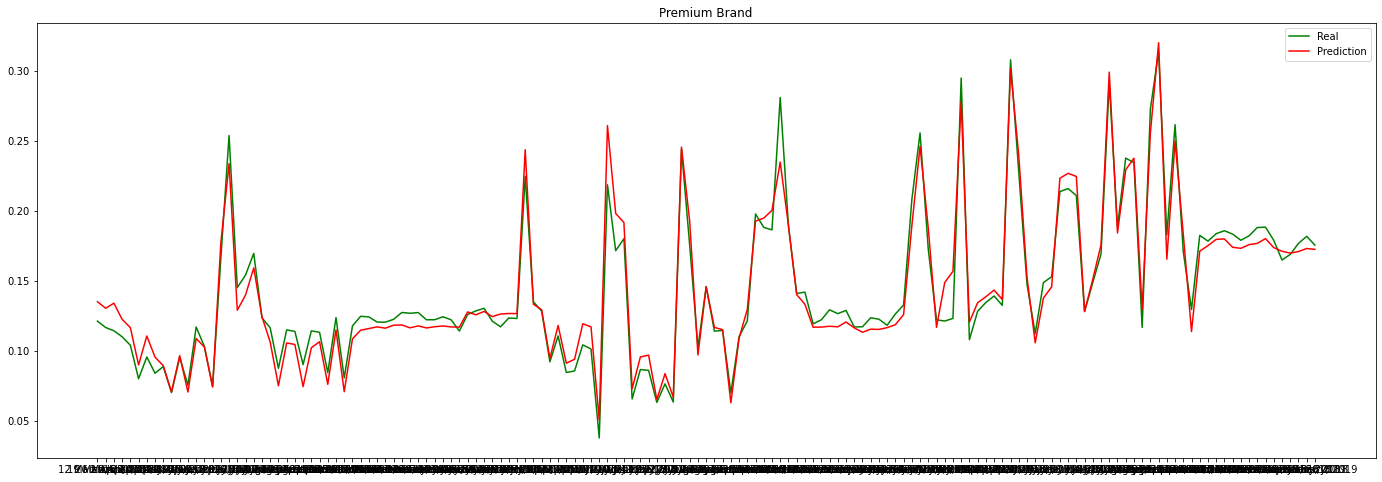

In [123]:
plt.figure(figsize=(24,8))
plt.plot(x['_Date'],x['Premium_Brand_pctg_share'],c='g',label='Real')
plt.plot(x['_Date'],x['Utility_Premium_Brand_Share'],c='r',label='Prediction')
plt.title('Premium Brand')
plt.legend(loc='best')

In [124]:
y_actual = x['Premium_Brand_pctg_share']
y_predicted = x['Utility_Premium_Brand_Share']

rmse = sqrt(mean_squared_error(y_actual, y_predicted))
print('rmse:',round(rmse,2))

mape = (y_actual-y_predicted).mean()
print('mape:',round(mape*100,2))

rmse: 0.01
mape: 0.03


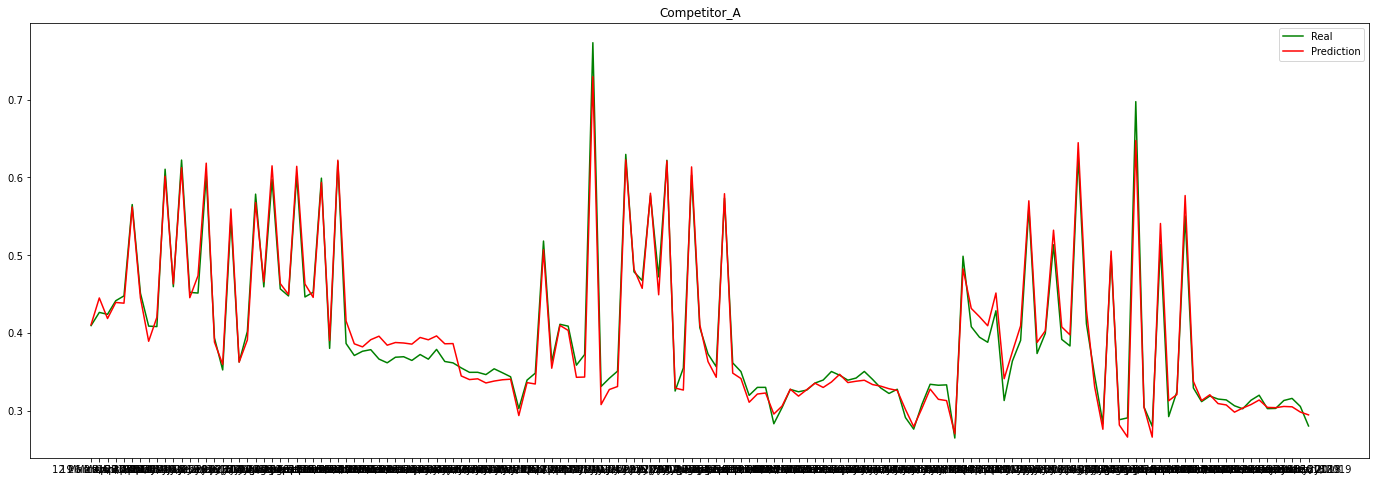

In [125]:
plt.figure(figsize=(24,8))
plt.plot(x['_Date'],x['Competitor_A_pctg_share'],c='g',label='Real')
plt.plot(x['_Date'],x['Utility_Competitor_A_Share'],c='r',label='Prediction')
plt.title('Competitor_A')
plt.legend(loc='best')

In [126]:
y_actual = x['Competitor_A_pctg_share']
y_predicted = x['Utility_Competitor_A_Share']

rmse = sqrt(mean_squared_error(y_actual, y_predicted))
print('rmse:',round(rmse,2))

mape = (y_actual-y_predicted).mean()
print('mape:',round(mape*100,2))

rmse: 0.01
mape: -0.05


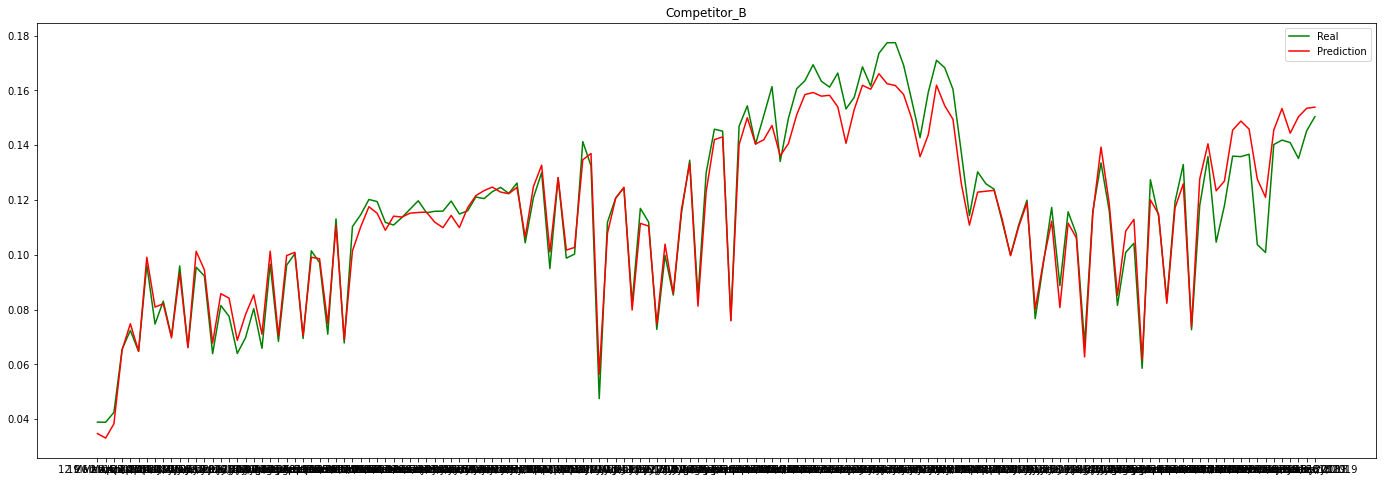

In [127]:
plt.figure(figsize=(24,8))
plt.plot(x['_Date'],x['Competitor_B_pctg_share'],c='g',label='Real')
plt.plot(x['_Date'],x['Utility_Competitor_B_Share'],c='r',label='Prediction')
plt.title('Competitor_B')
plt.legend(loc='best')

In [128]:
y_actual = x['Competitor_B_pctg_share']
y_predicted = x['Utility_Competitor_B_Share']

rmse = sqrt(mean_squared_error(y_actual, y_predicted))
print('rmse:',round(rmse,2))

mape = (y_actual-y_predicted).mean()
print('mape:',round(mape*100,2))

rmse: 0.01
mape: 0.05


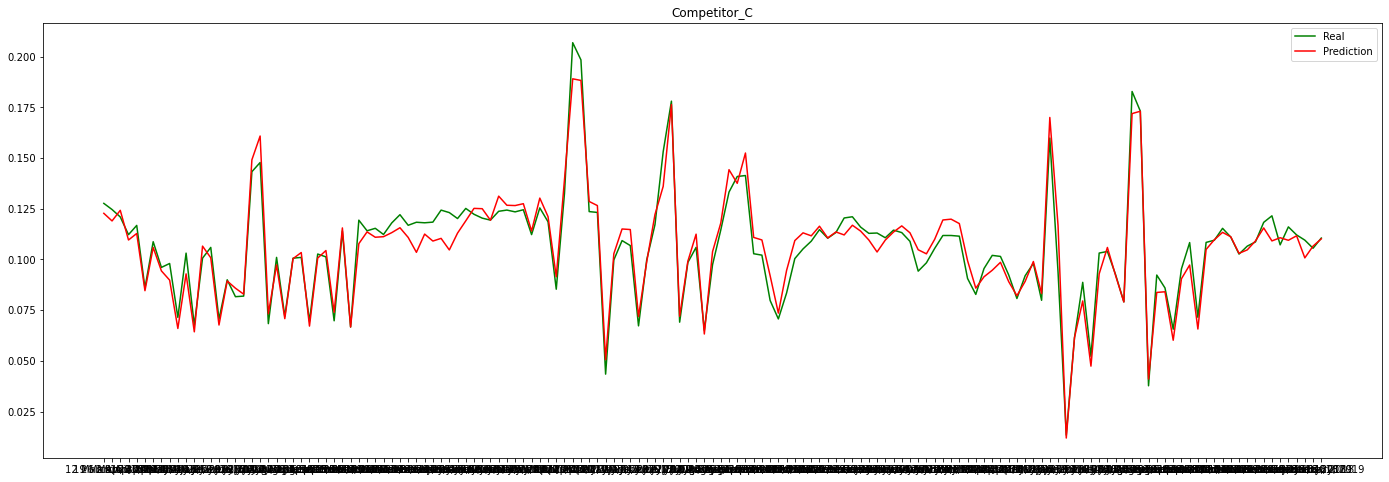

In [129]:
plt.figure(figsize=(24,8))
plt.plot(x['_Date'],x['Competitor_C_pctg_share'],c='g',label='Real')
plt.plot(x['_Date'],x['Utility_Competitor_C_Share'],c='r',label='Prediction')
plt.title('Competitor_C')
plt.legend(loc='best')

In [130]:
y_actual = x['Competitor_C_pctg_share']
y_predicted = x['Utility_Competitor_C_Share']

rmse = sqrt(mean_squared_error(y_actual, y_predicted))
print('rmse:',round(rmse,2))

mape = (y_actual-y_predicted).mean()
print('mape:',round(mape*100,2))

rmse: 0.01
mape: 0.03


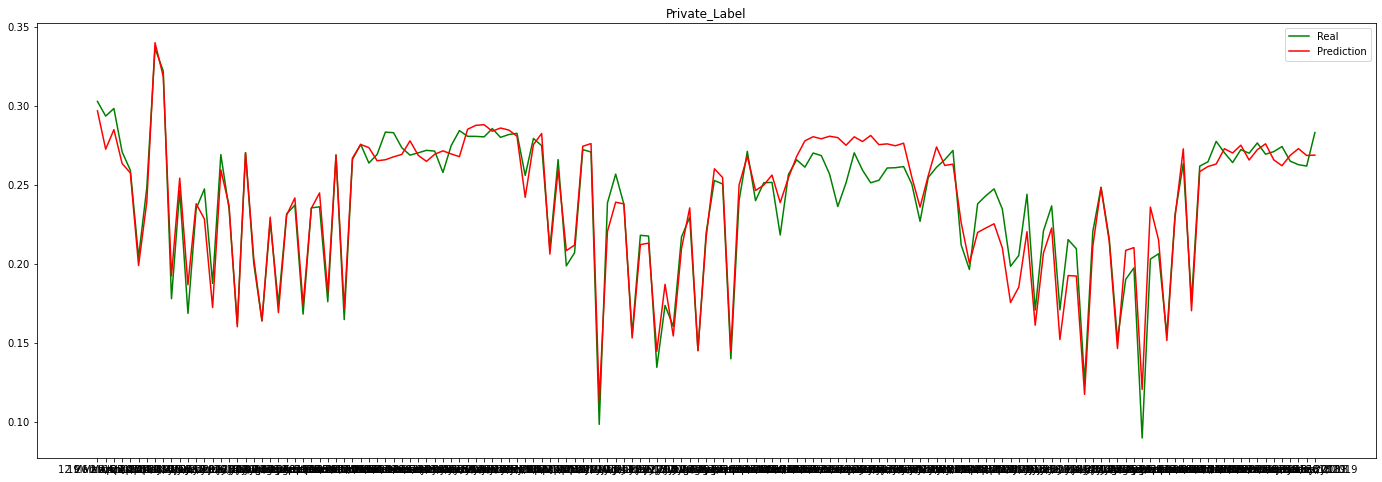

In [131]:
plt.figure(figsize=(24,8))
plt.plot(x['_Date'],x['Private_Label_pctg_share'],c='g',label='Real')
plt.plot(x['_Date'],x['Utility_Private_Label_Share'],c='r',label='Prediction')
plt.title('Private_Label')
plt.legend(loc='best')

In [132]:
y_actual = x['Private_Label_pctg_share']
y_predicted = x['Utility_Private_Label_Share']

rmse = sqrt(mean_squared_error(y_actual, y_predicted))
print('rmse:',round(rmse,2))

mape = (y_actual-y_predicted).mean()
print('mape:',round(mape*100,2))

rmse: 0.01
mape: -0.05


# Market Forecast

In [133]:
shares = shares[['Premium_Brand_pctg_share','Competitor_A_pctg_share','Competitor_B_pctg_share','Competitor_C_pctg_share','Private_Label_pctg_share']]

In [134]:
prices = sub[['Price_Premium_Brand','Price_Competitor_A','Price_Competitor_B','Price_Competitor_C','Price_Private_Label']]
distributions = sub[['Distribution_Premium_Brand','Distribution_Competitor_A','Distribution_Competitor_B','Distribution_Competitor_C','Distribution_Private_Label']]
items = sub[['Items_Premium_Brand','Items_Competitor_A','Items_Competitor_B','Items_Competitor_C','Items_Private_Label']]
features = sub[['Feature_Premium_Brand','Feature_Competitor_A','Feature_Competitor_B','Feature_Competitor_C','Feature_Private_Label']]
displays = sub[['Display_Premium_Brand','Display_Competitor_A','Display_Competitor_B','Display_Competitor_C','Display_Private_Label']]
features_and_displays = sub[['Feature_and_Display_Premium_Brand','Feature_and_Display_Competitor_A','Feature_and_Display_Competitor_B','Feature_and_Display_Competitor_C','Feature_and_Display_Private_Label']]

In [135]:
market = pd.DataFrame()
market

""


In [136]:
market['Date'] = sub['_Date']
market['Time'] = sub['Time'] 
market['Price'] = np.sum(shares.values*prices.values,axis=1).tolist()
market['Distribution'] = np.sum(shares.values*distributions.values,axis=1).tolist()
market['Items'] = np.sum(shares.values*items.values,axis=1).tolist()
market['Feature'] = np.sum(shares.values*features.values,axis=1).tolist()
market['Display'] = np.sum(shares.values*displays.values,axis=1).tolist()
market['Feature_and_Display'] = np.sum(shares.values*features_and_displays.values,axis=1).tolist()


In [137]:
market

,Date,Time,Price,Distribution,Items,Feature,Display,Feature_and_Display
11,"12 March, 2016",0.000000,4.873428,697.763021,2.955315,0.0,0.015832,0.0
12,"19 March, 2016",0.019165,4.909905,727.472996,3.409536,0.0,0.008905,0.0
13,"26 March, 2016",0.038330,4.894215,627.646651,3.831155,0.0,0.009094,0.0
14,"2 April, 2016",0.057495,4.926248,674.380927,3.859079,0.0,0.032988,0.0
15,"9 April, 2016",0.076660,4.952336,716.605537,3.861082,0.0,0.039793,0.0
...,...,...,...,...,...,...,...,...
155,"15 December, 2018",2.759754,4.907106,800.816885,2.981261,0.0,0.005321,0.0
156,"22 December, 2018",2.778919,4.937700,768.002440,3.024631,0.0,0.003470,0.0
157,"29 December, 2018",2.798084,4.960531,726.854366,3.056842,0.0,0.004290,0.0
158,"5 January, 2019",2.817248,4.912253,771.571475,3.029947,0.0,0.004705,0.0


In [138]:
extra_columns = range(1,27)

# cos columns
cos_columns = []
for col in extra_columns:
    
    col_name = 'cos_'+str(col)
    cos_columns.append(col_name)
    market[col_name] = col

# sin columns
sin_columns = []
for col in extra_columns:
    
    col_name = 'sin_'+str(col)
    sin_columns.append(col_name)
    market[col_name] = col



In [139]:
market

,Date,Time,Price,Distribution,Items,Feature,Display,Feature_and_Display,cos_1,cos_2,cos_3,cos_4,cos_5,cos_6,cos_7,cos_8,cos_9,cos_10,cos_11,cos_12,cos_13,cos_14,cos_15,cos_16,cos_17,cos_18,cos_19,cos_20,cos_21,cos_22,cos_23,cos_24,cos_25,cos_26,sin_1,sin_2,sin_3,sin_4,sin_5,sin_6,sin_7,sin_8,sin_9,sin_10,sin_11,sin_12,sin_13,sin_14,sin_15,sin_16,sin_17,sin_18,sin_19,sin_20,sin_21,sin_22,sin_23,sin_24,sin_25,sin_26
11,"12 March, 2016",0.000000,4.873428,697.763021,2.955315,0.0,0.015832,0.0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
12,"19 March, 2016",0.019165,4.909905,727.472996,3.409536,0.0,0.008905,0.0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
13,"26 March, 2016",0.038330,4.894215,627.646651,3.831155,0.0,0.009094,0.0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
14,"2 April, 2016",0.057495,4.926248,674.380927,3.859079,0.0,0.032988,0.0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
15,"9 April, 2016",0.076660,4.952336,716.605537,3.861082,0.0,0.039793,0.0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,"15 December, 2018",2.759754,4.907106,800.816885,2.981261,0.0,0.005321,0.0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
156,"22 December, 2018",2.778919,4.937700,768.002440,3.024631,0.0,0.003470,0.0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
157,"29 December, 2018",2.798084,4.960531,726.854366,3.056842,0.0,0.004290,0.0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
158,"5 January, 2019",2.817248,4.912253,771.571475,3.029947,0.0,0.004705,0.0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26


In [140]:
def time_cos_calc(col,time):
    
    return cos(2*pi*col*time)

def time_sin_calc(col,time):
    
    return sin(2*pi*col*time)


for col in cos_columns:
    
    market[col] = market.apply(lambda x: time_cos_calc(x[col],x['Time']),axis=1)

for col in sin_columns:
    
    market[col] = market.apply(lambda x: time_sin_calc(x[col],x['Time']),axis=1)

    


In [141]:
market['Actual'] = sub['Total_Volume']

In [142]:
market

,Date,Time,Price,Distribution,Items,Feature,Display,Feature_and_Display,cos_1,cos_2,cos_3,cos_4,cos_5,cos_6,cos_7,cos_8,cos_9,cos_10,cos_11,cos_12,cos_13,cos_14,cos_15,cos_16,cos_17,cos_18,cos_19,cos_20,cos_21,cos_22,cos_23,cos_24,cos_25,cos_26,sin_1,sin_2,sin_3,sin_4,sin_5,sin_6,sin_7,sin_8,sin_9,sin_10,sin_11,sin_12,sin_13,sin_14,sin_15,sin_16,sin_17,sin_18,sin_19,sin_20,sin_21,sin_22,sin_23,sin_24,sin_25,sin_26,Actual
11,"12 March, 2016",0.000000,4.873428,697.763021,2.955315,0.0,0.015832,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32024.0
12,"19 March, 2016",0.019165,4.909905,727.472996,3.409536,0.0,0.008905,0.0,0.992759,0.971139,0.935455,0.886224,0.824157,0.750154,0.665287,0.570784,0.468015,0.358468,0.243730,0.125461,0.005376,-0.114788,-0.233289,-0.348411,-0.458487,-0.561923,-0.657221,-0.743001,-0.818020,-0.881192,-0.931601,-0.968519,-0.991410,-0.999942,0.120126,0.238513,0.353445,0.463258,0.566362,0.661263,0.746588,0.821100,0.883720,0.933542,0.969843,0.992099,0.999986,0.993390,0.972408,0.937342,0.888701,0.827189,0.753698,0.669290,0.575190,0.472759,0.363482,0.248940,0.130793,0.010751,36495.0
13,"26 March, 2016",0.038330,4.894215,627.646651,3.831155,0.0,0.009094,0.0,0.971139,0.886224,0.750154,0.570784,0.358468,0.125461,-0.114788,-0.348411,-0.561923,-0.743001,-0.881192,-0.968519,-0.999942,-0.973648,-0.891153,-0.757220,-0.579579,-0.368484,-0.136120,0.104101,0.338313,0.552997,0.735762,0.876058,0.965787,0.999769,0.238513,0.463258,0.661263,0.821100,0.933542,0.992099,0.993390,0.937342,0.827189,0.669290,0.472759,0.248940,0.010751,-0.228058,-0.453703,-0.653160,-0.814916,-0.929634,-0.990692,-0.994567,-0.941034,-0.833183,-0.677240,-0.482206,-0.259338,-0.021501,35956.0
14,"2 April, 2016",0.057495,4.926248,674.380927,3.859079,0.0,0.032988,0.0,0.935455,0.750154,0.468015,0.125461,-0.233289,-0.561923,-0.818020,-0.968519,-0.993993,-0.891153,-0.673275,-0.368484,-0.016127,0.338313,0.649080,0.876058,0.989946,0.976043,0.836144,0.588307,0.264526,-0.093402,-0.439273,-0.728438,-0.923571,-0.999480,0.353445,0.661263,0.883720,0.992099,0.972408,0.827189,0.575190,0.248940,-0.109446,-0.453703,-0.739392,-0.929634,-0.999870,-0.941034,-0.760720,-0.482206,-0.141444,0.217577,0.548511,0.808638,0.964378,0.995628,0.898354,0.685111,0.383428,0.032249,33345.0
15,"9 April, 2016",0.076660,4.952336,716.605537,3.861082,0.0,0.039793,0.0,0.886224,0.570784,0.125461,-0.348411,-0.743001,-0.968519,-0.973648,-0.757220,-0.368484,0.104101,0.552997,0.876058,0.999769,0.895979,0.588307,0.146764,-0.328176,-0.728438,-0.962943,-0.978326,-0.771089,-0.388388,0.082692,0.534955,0.865487,0.999075,0.463258,0.821100,0.992099,0.937342,0.669290,0.248940,-0.228058,-0.653160,-0.929634,-0.994567,-0.833183,-0.482206,-0.021501,0.444096,0.808638,0.989172,0.944617,0.685111,0.269707,-0.207070,-0.636728,-0.921496,-0.996575,-0.844881,-0.500931,-0.042993,37821.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,"15 December, 2018",2.759754,4.907106,800.816885,2.981261,0.0,0.005321,0.0,0.061245,-0.992498,-0.182817,0.970105,0.301646,-0.933156,-0.415948,0.882206,0.524010,-0.818020,-0.624210,0.741560,0.715044,-0.653974,-0.795150,0.556576,0.863325,-0.450826,-0.918547,0.338313,0.959987,-0.220724,-0.987024,0.099823,0.999251,0.022576,-0.998123,-0.122261,0.983147,0.242687,-0.953420,-0.359472,0.909388,0.470863,-0.851712,-0.575190,0.781257,0.670887,-0.699079,-0.756517,0.606413,0.830797,-0.504648

In [174]:
bounds = ((-10000,10000),)*59
bounds = list(bounds)
bounds[1] = (-10000,0)
bounds = tuple(bounds)
len(bounds)

59

In [175]:
def f(x):
    
    cols = ['Time', 'Price', 'Distribution', 'Items', 'Feature', 'Display',
       'Feature_and_Display', 'cos_1', 'cos_2', 'cos_3', 'cos_4', 'cos_5',
       'cos_6', 'cos_7', 'cos_8', 'cos_9', 'cos_10', 'cos_11', 'cos_12',
       'cos_13', 'cos_14', 'cos_15', 'cos_16', 'cos_17', 'cos_18', 'cos_19',
       'cos_20', 'cos_21', 'cos_22', 'cos_23', 'cos_24', 'cos_25', 'cos_26',
       'sin_1', 'sin_2', 'sin_3', 'sin_4', 'sin_5', 'sin_6', 'sin_7', 'sin_8',
       'sin_9', 'sin_10', 'sin_11', 'sin_12', 'sin_13', 'sin_14', 'sin_15',
       'sin_16', 'sin_17', 'sin_18', 'sin_19', 'sin_20', 'sin_21', 'sin_22',
       'sin_23', 'sin_24', 'sin_25', 'sin_26']
    
    models = dict()
    
    Time = market['Time'] 
    
    models['Time'] = x[0]
    
    for i,col in enumerate(cols):        

        if i>0:
        
            models[col] = np.array(market[col],dtype=float)*x[i]
            
    models_df = pd.DataFrame(models)
    models_df['Model'] = models_df.sum(axis=1)
    
    
    
    
    df = pd.DataFrame(np.column_stack([list(models_df['Model']),list(market['Actual'])]),columns=['Model','Actual'])
    df['loss'] = (df['Actual']-df['Model'])*(df['Actual']-df['Model'])
    
    return df['loss'].sum()
    
    
def objective(x):
    # minus sign means the opposite of minimize
    return f(x)

def constraint(x):
    return x[1]+0.01

# cons = (
#                 {'type': 'ineq','fun': lambda x: x[1]-0.01},
#                 {'type': 'ineq','fun': lambda x: -np.inf}
#             ) 

cons = ({'type':'ineq','fun':constraint})


# x0 = np.random.randn(59)
x0 = np.array([0.01]*59)
# x0[1] = 0

# print(len(x0))

# x0 = np.array([102792.0694,-24585.8,40.6986503,6577.837157,3703.693813,52751.5722,1140.050454
#                ,-1669.020769,-136.194456,1003.986485,-464.5968338,607.7504317,253.4724544,1134.101294,-319.2457391,413.533434,-417.4734428,-69.77449693,338.2949151,106.7264954,-27.06820493,-780.7266443,534.3623223,-431.1534526,346.2845084,-367.797239,-539.2970877,-65.98896405,-128.1338721,-11.71948747,560.723705,49.65827575,204.8537025
#                ,6143.769035,-1194.761776,100.6873273,-328.4573927,104.0679733,-43.3937271,572.9090539,-164.825638,-746.9738489,352.4248808,-747.0411233,1232.557485,13.82136065,588.6063503,-317.6942536,-97.11715299,-284.6733415,-215.5913069,882.9532061,36.53097404,-14.73882825,-11.12218506,-267.6317771,-21.43354964,-66.79306594,389.1005213])


# sol = minimize(objective,x0,options={'disp':True},constraints=cons)

# bounds = ((0.25, 0.75), (0, 2.0))

sol = minimize(objective,x0,options={'disp':True},bounds=bounds)

xOpt = sol.x
print(xOpt)

print(-sol.fun)

print(f(xOpt))

print(sol)



59
[-3.24178369e+02 -1.00000000e+04  6.89263043e+01  1.00000000e+04
  2.91096660e+03  1.63574749e+03 -1.40475371e+02 -2.53792127e+03
  2.56695143e+02  1.12958338e+03 -7.60860037e+02  5.05441554e+02
  3.87402186e+02  1.16141447e+03 -2.53317324e+02  9.81695097e+01
 -4.09186679e+01 -1.40166887e+02  9.65585598e+02  2.21587501e+02
  6.58756332e+01 -9.99112844e+02  5.26147036e+02  1.86173040e+02
  2.48033972e+02 -1.42263475e+02 -4.00358166e+02  1.34070904e+01
 -4.41365307e+02  6.47846542e+02  6.54774693e+02  1.11093773e+02
  6.64603503e+02  7.16576078e+03 -1.90121760e+03  5.25667521e+02
  4.35219378e+01 -8.74527393e+01 -1.71930158e+02  9.97467573e+02
  2.73168567e+02 -1.05864640e+02  2.78057351e+02 -3.66451675e+02
  7.78116342e+02  2.72614977e+02  6.68171111e+02 -1.02119618e+02
 -7.21717464e+02  1.52413855e+02 -2.64824666e+00  9.47482836e+02
 -1.24726347e+02  3.65786703e+02 -4.00540196e+02 -2.68504062e+02
  5.66497399e+02  3.34120885e+02  9.05415447e+02]
-2008537061.7692552
2008537061.769255

In [176]:
params = xOpt
params_df = pd.DataFrame(params).T
# params_df.columns = ['Premium_Brand','Competitor_A','Competitor_B','Competitor_C','Private_Label']
# params_df.index = ['Intercept','Time','Price','Distribution','Items','Feature','Display','Feature_and_Display']
params_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,-324.178369,-10000.0,68.926304,10000.0,2910.966602,1635.747491,-140.475371,-2537.921268,256.695143,1129.583385,-760.860037,505.441554,387.402186,1161.414465,-253.317324,98.16951,-40.918668,-140.166887,965.585598,221.587501,65.875633,-999.112844,526.147036,186.17304,248.033972,-142.263475,-400.358166,13.40709,-441.365307,647.846542,654.774693,111.093773,664.603503,7165.760784,-1901.217602,525.667521,43.521938,-87.452739,-171.930158,997.467573,273.168567,-105.86464,278.057351,-366.451675,778.116342,272.614977,668.171111,-102.119618,-721.717464,152.413855,-2.648247,947.482836,-124.726347,365.786703,-400.540196,-268.504062,566.497399,334.120885,905.415447


In [93]:
market_forecast_model = params_df.copy()

In [151]:
# from scipy.optimize import minimize

# def f(x):
#     return (int(558*x[0]*x[1]*x[2])-(x[2]*(558-int(558*x[0])))-(x[2]*558))

# x0 = [0.4, 1.0, 2.0]

# #real data Ranges 
# #x[0] 0..1    
# #x[1] 1..3
# #x[2] 5..50

# cons=( 
#         {'type': 'ineq','fun': lambda x: x[0]},
#         {'type': 'ineq','fun': lambda x: 1-x[0]},
#         {'type': 'ineq','fun': lambda x: x[1]-1},
#         {'type': 'ineq','fun': lambda x: 3-x[1]},
#         {'type': 'ineq','fun': lambda x: x[2]-5},
#         {'type': 'ineq','fun': lambda x: 50-x[2]}
# )

# res = minimize(f, x0, constraints=cons, method="cobyla")
# print(res)

     fun: -55800.0
   maxcv: 7.395570986446986e-32
 message: 'Optimization terminated successfully.'
    nfev: 82
  status: 1
 success: True
       x: array([-7.39557099e-32,  1.93750000e+00,  5.00000000e+01])


# Summary

In [94]:
choice_model

,Premium_Brand,Competitor_A,Competitor_B,Competitor_C,Private_Label
Intercept,0.477262,2.545248,-3.947163,-0.163590,2.514830
Time,-0.256657,-0.153594,-0.127899,-0.178019,-0.138057
Price,-0.320629,-0.397131,1.989591,-0.381909,-0.734039
Distribution,0.000952,0.000936,0.002478,0.002700,0.000642
Items,0.296731,0.120096,-3.947163,-0.163590,0.152676
Feature,0.091948,0.092996,0.081124,-0.039357,0.484764
Display,0.572968,0.817537,0.051981,-0.555959,0.574848
Feature_and_Display,1.231009,0.404435,0.010000,0.000525,-1.219893


In [95]:
market_forecast_model

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,104353.403373,-24544.252921,39.107617,6404.354146,5682.15791,54746.349229,-321.563475,-1728.764146,-154.113607,1046.278337,-504.979673,649.521234,232.582754,1094.179709,-253.624902,344.546675,-418.448169,-44.2806,276.499611,143.745933,-34.031104,-805.669004,581.909888,-511.118439,373.361526,-333.427768,-603.87636,-33.974935,-156.816926,-33.92591,616.403117,-16.785095,158.111355,6194.806501,-1253.859519,122.782535,-350.382395,99.109337,10.630447,510.988518,-162.742626,-728.643268,273.515331,-711.96202,1232.84086,-30.340773,630.69266,-357.805243,-39.721936,-286.219246,-276.582797,913.09503,42.138124,-67.583051,27.134182,-329.551103,-29.939285,-35.594507,283.415858


In [120]:
Time = [market.loc[market.index[-1],'Time']]*5
Price = [4.69,6.99,2.99,5.49,3.49]
Distribution = [602,658,893,920,931]
Items = [4,5,1,1,2]
Feature = [0,0,0,0,0]
Display = [0,0,0,0,0]
Feature_and_Display = [0,0,0,0,0]
current_market = pd.DataFrame([Time,Price,Distribution,Items,Feature,Display,Feature_and_Display])
current_market.index = ['Time','Price','Distribution','Items','Feature','Display','Feature_and_Display']
current_market.columns = ['Premium_Brand','Competitor_A','Competitor_B','Competitor_C','Private_Label']
current_market

,Premium_Brand,Competitor_A,Competitor_B,Competitor_C,Private_Label
Time,2.836413,2.836413,2.836413,2.836413,2.836413
Price,4.690000,6.990000,2.990000,5.490000,3.490000
Distribution,602.000000,658.000000,893.000000,920.000000,931.000000
Items,4.000000,5.000000,1.000000,1.000000,2.000000
Feature,0.000000,0.000000,0.000000,0.000000,0.000000
Display,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_and_Display,0.000000,0.000000,0.000000,0.000000,0.000000


In [191]:
np.exp(
        0.477262 + (-0.256657*2.836413) + (-0.320629*4.690000) + (0.000952*602.000000) + (0.296731*4) + (0.091948*0) + (0.572968*0) + (1.231009*0)
        )

1.0055701948248534

In [192]:
(-0.256657*2.836413),(-0.320629*4.690000),(0.000952*602.000000),(0.296731*4),(0.091948*0),(0.572968*0),(1.231009*0)


(-0.727985251341, -1.50375001, 0.5731040000000001, 1.186924, 0.0, 0.0, 0.0)

In [193]:
(-0.256657*2.836413),(-0.320629*4.690000),(0.000952*602.000000),(0.296731*4),(0.091948*0),(0.572968*0),(1.231009*0)

(-0.727985251341, -1.50375001, 0.5731040000000001, 1.186924, 0.0, 0.0, 0.0)

In [207]:
utilities = []

for col in current_market.columns:
    
    tmp = np.exp(choice_model[col][0] + ((choice_model[col][1:].values)*(current_market[col].values)).sum())
    
    utilities.append(tmp)
    

In [211]:
utilities_df = pd.DataFrame(utilities).T
utilities_df.columns = current_market.columns
utilities_df['total'] = utilities_df.sum(axis=1)
utilities_df

,Premium_Brand,Competitor_A,Competitor_B,Competitor_C,Private_Label,total
0,1.005626,1.732787,0.909234,0.641087,1.590993,5.879727


In [214]:
share_df = utilities_df.copy()

for col in share.columns[0:-1]:
    
    share_df[col] = share_df[col]/share_df['total']
    
share_df

,Premium_Brand,Competitor_A,Competitor_B,Competitor_C,Private_Label,total
0,0.171033,0.294705,0.154639,0.109034,0.27059,5.879727


In [258]:
# Market Forecast

var = dict()

Time = market.loc[market.index[-1],'Time'] + (7/365.5)
var['Time'] = Time


for idx in choice_model.index[1:]:

    if idx!='Time':
        
        result = (current_market[current_market.index==idx].values[0]*share_df.values[0][0:-1]).sum()
        
        var[idx] = result
        
var        

{'Time': 2.855565262254091,
 'Price': 4.867455524375307,
 'Distribution': 787.200017469052,
 'Items': 2.9625091611634278,
 'Feature': 0.0,
 'Display': 0.0,
 'Feature_and_Display': 0.0}

In [264]:
extra_columns = range(1,27)

extra_columns_name = []

# cos columns
cos_columns = []
for col in extra_columns:
    
    col_name = 'cos_'+str(col)
    var[col_name] = cos(2*pi*col*var['Time'])
    
# sin columns
sin_columns = []
for col in extra_columns:
    
    col_name = 'sin_'+str(col)
    var[col_name] = sin(2*pi*col*var['Time'])
    

In [273]:
len(var), len(market_forecast_model.values[0])

(59, 59)

In [295]:
var

{'Time': 2.855565262254091,
 'Price': 4.867455524375307,
 'Distribution': 787.200017469052,
 'Items': 2.9625091611634278,
 'Feature': 0.0,
 'Display': 0.0,
 'Feature_and_Display': 0.0,
 'cos_1': 0.6157095341571232,
 'cos_2': -0.2418035390960367,
 'cos_3': -0.9134710229858536,
 'cos_4': -0.8830620969612629,
 'cos_5': -0.17394848171780744,
 'cos_6': 0.6688586196696438,
 'cos_7': 0.9975937399853493,
 'cos_8': 0.5595973341792458,
 'cos_9': -0.3084949120992105,
 'cos_10': -0.9394838514161392,
 'cos_11': -0.8484034169079112,
 'cos_12': -0.10525629378723778,
 'cos_13': 0.7187888096782161,
 'cos_14': 0.9903865401159132,
 'cos_15': 0.5007920608222418,
 'cos_16': -0.373701647158963,
 'cos_17': -0.9609753949942783,
 'cos_18': -0.8096617784178007,
 'cos_19': -0.03605755783456438,
 'cos_20': 0.7652598141434047,
 'cos_21': 0.9784130851854217,
 'cos_22': 0.4395767156420381,
 'cos_23': -0.4371099355568574,
 'cos_24': -0.9778422252363493,
 'cos_25': -0.7670236264020631,
 'cos_26': 0.03331470583725374,


In [300]:
model = market_forecast_model.values[0][1:] * np.array( tuple(var.values()) )[1:]
model = market_forecast_model.values[0][0] + model.sum()
model

32331.633559739916

In [218]:
current_market.sum(axis=1)*current_market.sum(axis=1)

Time                   2.011310e+02
Price                  5.593225e+02
Distribution           1.603202e+07
Items                  1.690000e+02
Feature                0.000000e+00
Display                0.000000e+00
Feature_and_Display    0.000000e+00
dtype: float64

In [302]:
share_df

,Premium_Brand,Competitor_A,Competitor_B,Competitor_C,Private_Label,total
0,0.171033,0.294705,0.154639,0.109034,0.27059,5.879727


In [309]:
weekly_volume = share_df.copy()
weekly_volume.iloc[:,:-1]
for col in weekly_volume.columns:
    weekly_volume[col] = weekly_volume[col]*model
    
weekly_volume['total'] = model
weekly_volume
    

,Premium_Brand,Competitor_A,Competitor_B,Competitor_C,Private_Label,total
0,5529.77044,9528.30318,4999.724897,3525.232025,8748.603018,32331.63356


In [312]:
yearly_volume = weekly_volume.copy()
for col in yearly_volume.columns:
    yearly_volume[col] = yearly_volume[col]*52
yearly_volume

,Premium_Brand,Competitor_A,Competitor_B,Competitor_C,Private_Label,total
0,287548.062859,495471.765352,259985.694639,183312.065311,454927.356945,1.681245e+06


# End Here

In [331]:
big = [-1, 0, 1, 2, 3]
small = [1,2,4]

all(elem in big for elem in small)


False

In [179]:
data = pd.read_csv('premium_brand.csv',encoding='utf-16')
data

,Date,Avg_Unit_Price,Avg_Number_Of_Stores_Selling,Units,Feat_Disp_Units,Feat_Wo_Disp_Units,Disp_Wo_Feat_Units,Distinct_Count_of_Units
0,"2 January, 2016",$4.99,634,2516,0,0,0,2
1,"9 January, 2016",$4.99,711,3282,0,0,0,2
2,"16 January, 2016",$4.99,728,3489,0,0,0,2
3,"23 January, 2016",$4.99,746,3828,0,0,0,2
4,"30 January, 2016",$4.99,732,3566,0,0,0,2
...,...,...,...,...,...,...,...,...
154,"15 December, 2018",$4.65,597,5048,0,0,0,4
155,"22 December, 2018",$4.66,557,4426,0,0,0,4
156,"29 December, 2018",$4.66,516,3953,0,0,0,4
157,"5 January, 2019",$4.66,591,4981,0,0,0,4


In [186]:
data.iloc[-1,data.columns.get_loc('Avg_Unit_Price')]

'$4.65'

In [29]:
files = ['premium_brand.csv','competitor_A.csv','competitor_B.csv','competitor_C.csv','private_label.csv']
players = ['premium_brand','competitor_A','competitor_B','competitor_C','private_label']

total_volume = pd.DataFrame()
shapes = []

for player,file in zip(players,files):
    
    data = pd.read_csv(file,encoding='utf-16')
    data = data[data.index>=data[data['Date']=='12 March, 2016'].index[0]]
    
    shapes.append(data.shape)
    
    total_volume = pd.concat([total_volume,data['Units']],axis=1)
    total_volume.rename(columns={'Units':player+'_volume'},inplace=True)
        

In [32]:
len(set(shapes))

1

In [34]:
data.shape[0]

149

In [37]:
Time = []
for i in range(0,data.shape[0]):
    
    if i==0:
        Time.append(i)
    else:        
        Time.append(Time[-1]+7/365.25)

In [38]:
Time

[0,
 0.019164955509924708,
 0.038329911019849415,
 0.05749486652977412,
 0.07665982203969883,
 0.09582477754962354,
 0.11498973305954825,
 0.13415468856947296,
 0.15331964407939766,
 0.17248459958932236,
 0.19164955509924705,
 0.21081451060917175,
 0.22997946611909645,
 0.24914442162902115,
 0.26830937713894587,
 0.28747433264887057,
 0.30663928815879526,
 0.32580424366871996,
 0.34496919917864466,
 0.36413415468856936,
 0.38329911019849405,
 0.40246406570841875,
 0.42162902121834345,
 0.44079397672826814,
 0.45995893223819284,
 0.47912388774811754,
 0.49828884325804224,
 0.5174537987679669,
 0.5366187542778916,
 0.5557837097878163,
 0.574948665297741,
 0.5941136208076657,
 0.6132785763175904,
 0.6324435318275151,
 0.6516084873374398,
 0.6707734428473645,
 0.6899383983572892,
 0.7091033538672139,
 0.7282683093771386,
 0.7474332648870633,
 0.766598220396988,
 0.7857631759069127,
 0.8049281314168374,
 0.8240930869267621,
 0.8432580424366868,
 0.8624229979466115,
 0.8815879534565362,
 0.9

In [49]:
data['Avg_Unit_Price'] = data['Avg_Unit_Price'].apply(lambda x:float(str(x).replace('$','')))

# data[['Avg_Unit_Price','Avg_Number_Of_Stores_Selling']]

data[['Avg_Unit_Price','Avg_Number_Of_Stores_Selling']].values*np.array([1,2])

# * [0.2,0.5]

array([[   3.29, 1228.  ],
       [   3.29, 1244.  ],
       [   3.29, 1254.  ],
       [   3.29, 1212.  ],
       [   3.3 , 1234.  ],
       [   3.3 , 1246.  ],
       [   3.3 , 1258.  ],
       [   2.99, 1288.  ],
       [   2.99, 1290.  ],
       [   3.29, 1912.  ],
       [   3.31, 1950.  ],
       [   3.3 , 1912.  ],
       [   3.31, 1928.  ],
       [   3.31, 1948.  ],
       [   3.25, 1954.  ],
       [   3.  , 1942.  ],
       [   3.02, 1938.  ],
       [   3.31, 1924.  ],
       [   2.99, 1952.  ],
       [   3.31, 1940.  ],
       [   3.32, 1946.  ],
       [   3.33, 1902.  ],
       [   3.32, 1940.  ],
       [   3.32, 1940.  ],
       [   3.32, 1928.  ],
       [   3.32, 1892.  ],
       [   3.31, 1928.  ],
       [   3.31, 1926.  ],
       [   3.31, 1898.  ],
       [   3.32, 1908.  ],
       [   3.31, 1884.  ],
       [   3.31, 1864.  ],
       [   3.31, 1898.  ],
       [   3.32, 1858.  ],
       [   3.43, 1854.  ],
       [   3.43, 1880.  ],
       [   3.43, 1890.  ],
 

In [52]:
a = [1,2]
b = [2,3]
np.array(a)*np.array(b)

array([2, 6])

In [177]:
future = pd.DataFrame()			
time_in_future = [2.86]*5
time_in_future



[2.86, 2.86, 2.86, 2.86, 2.86]

In [2]:
pd.read_csv('market.csv')

,Unnamed: 0,Time,Avg_Unit_Price,Avg_Number_Of_Stores_Selling,Feat_Disp_Units,Feat_Wo_Disp_Units,Disp_Wo_Feat_Units,Distinct_Count_of_Units,cos_1,cos_2,cos_3,cos_4,cos_5,cos_6,cos_7,cos_8,cos_9,cos_10,cos_11,cos_12,cos_13,cos_14,cos_15,cos_16,cos_17,cos_18,cos_19,cos_20,cos_21,cos_22,cos_23,cos_24,cos_25,cos_26,sin_1,sin_2,sin_3,sin_4,sin_5,sin_6,sin_7,sin_8,sin_9,sin_10,sin_11,sin_12,sin_13,sin_14,sin_15,sin_16,sin_17,sin_18,sin_19,sin_20,sin_21,sin_22,sin_23,sin_24,sin_25,sin_26
0,0,-1746.048978,-10000.0,70.713547,-108.998048,1802.35409,39.370089,10000.0,-2576.99596,210.879057,1072.393676,-736.056077,505.13944,407.792812,1165.741401,-261.81683,119.70172,-19.135469,-125.847251,967.621987,209.259929,42.982596,-991.161773,516.938268,227.600043,222.772963,-141.690855,-382.33646,17.334907,-414.384267,690.301714,665.476802,113.0284,456.710559,7144.920674,-1805.866644,543.562905,86.121967,-77.320469,-170.629473,1007.387905,272.686531,-100.087279,269.576056,-349.959956,757.251175,289.020069,646.811722,-85.988902,-741.908829,186.447918,2.844048,940.479095,-119.826952,416.002869,-386.177975,-243.905873,560.695766,282.545147,837.76776


In [7]:
a = np.array([ 5.77283809e-01, -1.17846307e-01, -3.20663231e-01,  9.51745144e-04,
  1.23140538e+00,  9.19140552e-02,  5.70969419e-01,  2.96776816e-01])

b = np.array([  2.85557837,   4.65,       602.,           0.,           0.,
   0.,           4.        ])

In [14]:
np.exp(a[0]+(a[1:]*b).sum())

1.6648553791398042

In [40]:
param = [-1746.048977749413, -10000.0, 70.71354702966406, -108.99804776111414, 1802.354089707866, 39.37008908563005, 10000.0, -2576.99595982776, 210.87905678818476, 1072.3936763038485, -736.0560769231735, 505.1394403520991, 407.7928115552292, 1165.7414012817462, -261.8168298234731, 119.70171988403423, -19.135469168838696, -125.84725092791189, 967.6219873724588, 209.25992901513504, 42.98259562015942, -991.1617727960984, 516.9382679220029, 227.60004301122197, 222.77296341264304, -141.6908545563634, -382.3364598122035, 17.334906714075668, -414.3842668951924, 690.3017137248771, 665.4768017758803, 113.02839990416643, 456.71055856664384, 7144.920673580057, -1805.8666438706011, 543.5629049170822, 86.12196687601097, -77.32046913109652, -170.62947290431254, 1007.3879046434394, 272.6865313654795, -100.08727910704192, 269.5760559914764, -349.9599557185176, 757.2511750277957, 289.02006938442776, 646.8117224730345, -85.98890154841965, -741.9088286311215, 186.44791791029348, 2.8440476222741755, 940.4790954947134, -119.82695152262605, 416.002869319077, -386.1779747488216, -243.90587257418275, 560.6957663096046, 282.5451468225661, 837.7677597902681]
value = [2.85557837097879, 4.863299341514821, 786.7906322995763, 0.0, 0.0, 0.0064247553215100355, 2.964969280545122, 0.6157744331240933, -0.24164369502140304, -0.9133704517637233, -0.8832166493128063, -0.17435401134898756, 0.6684911643101362, 0.9976335468520698, 0.5601432992466814, -0.307789701728283, -0.9392013574530342, -0.8488826652217434, -0.10623912647855685, 0.718043989455876, 0.9905453876092821, 0.5018610596216893, -0.3724789686180855, -0.9605871111245643, -0.8105309990200291, -0.03762142177754908, 0.7641983796832443, 0.9787690698651488, 0.44120355862794103, -0.4354053274522384, -0.9774264960101464, -0.7683431655500298, 0.03117434158742046, -0.7879224882630915, -0.9703650471118604, -0.40712948535439175, 0.4689651910074556, 0.9846830346494841, 0.743720083928946, -0.06875540848078032, -0.8283957292918903, -0.9514544127334817, -0.34336687399686333, 0.5285813283554665, 0.9943406096529867, 0.6959977221272278, -0.13718540405588753, -0.8649482509580532, -0.9280406337748404, -0.2779791393996391, 0.5856957398065941, 0.999292063724833, 0.644981268324518, -0.20496611396841063, -0.8974070536016758, -0.9002345254577881, -0.21127575558337794, 0.6400381082033784, 0.9995139620968738]


param[0]+(np.array(param[1:])*np.array(value[1:])).sum()

30836.3494502339

In [39]:
np.array(a[1:])

array([ 4.86329934e+00,  7.86790632e+02,  0.00000000e+00,  0.00000000e+00,
        6.42475532e-03,  2.96496928e+00,  5.16665278e-01, -4.66113981e-01,
       -9.98315097e-01, -5.65475513e-01,  4.13991972e-01,  9.93266067e-01,
        6.12380205e-01, -3.60474889e-01, -9.84869922e-01, -6.57221295e-01,
        3.05743076e-01,  9.73154958e-01,  6.99847677e-01, -2.49980969e-01,
       -9.58160651e-01, -7.40115709e-01,  1.93376474e-01,  9.39937528e-01,
        7.77889694e-01, -1.36120339e-01, -9.18546999e-01, -8.13042342e-01,
        7.84055038e-02,  8.94061145e-01,  8.45455196e-01, -2.04264576e-02,
       -8.56187474e-01, -8.84724678e-01, -5.80255693e-02,  8.24765084e-01,
        9.10280532e-01,  1.15855604e-01, -7.90563397e-01, -9.32768918e-01,
       -1.73295227e-01,  7.53697664e-01,  9.52114054e-01,  2.30150880e-01,
       -7.14292117e-01, -9.68250750e-01, -2.86230968e-01,  6.72479545e-01,
        9.81124630e-01,  3.41346514e-01, -6.28400847e-01, -9.90692310e-01,
       -3.95311789e-01,  

In [32]:
b

[2.85557837097879,
 4.863299341514821,
 786.7906322995763,
 0.0,
 0.0,
 0.0064247553215100355,
 2.964969280545122,
 0.5166652778119736,
 -0.46611398140695237,
 -0.9983150972033096,
 -0.5654755126739186,
 0.4139919715002299,
 0.993266066608107,
 0.6123802049903437,
 -0.36047488913233794,
 -0.9848699224659317,
 -0.6572212950667056,
 0.30574307646677473,
 0.9731549581502807,
 0.6998476771468836,
 -0.2499809690719691,
 -0.9581606508134295,
 -0.7401157086100574,
 0.19337647440934533,
 0.9399375283561009,
 0.7778896940186111,
 -0.13612033862168454,
 -0.918546999158287,
 -0.8130423423852638,
 0.07840550375556408,
 0.8940611451449495,
 0.8454551961188894,
 -0.02042645758422294,
 -0.8561874740402806,
 -0.8847246782683069,
 -0.05802556932893046,
 0.824765084473251,
 0.9102805323269046,
 0.11585560376977717,
 -0.7905633969113322,
 -0.9327689179561188,
 -0.173295227349023,
 0.753697664392588,
 0.9521140536682735,
 0.2301508797018279,
 -0.7142921172686364,
 -0.9682507501168482,
 -0.2862309683328922

In [41]:
x = ['a', 'b']
y = ['b', 'a']

set(x)==set(y)

True